# Why had not been proven any Coronavirus case in Hargita county, until April 2?

This is a short project made for "Inverstigation of minority communities" course taught by Kiss Tamás, in March 2020, at the  Mathias Corvinus Collegium. I haven't ever used Python for working with big data before, but having some experience with the programming language and deep learning, I hope that I will be able to create something useful. My main problem is the lack of time, but I feel really committed to this project.
### Copyrights:
1. I will use a database made for the I. SzékelyData Data Visualisation contest, provided by Csala Dénes. This is a minor part of the original database (having around 50.000 samples). http://csaladenes.egologo.ro/ 
2. Having a 'tricky' dataset, and getting some of the cities names in Romanian, some of them in Hungarian and an other part in 'Székely dialect', I decided to save time by inspiring from Imecs Tamás's  back from 2018. I only used smaller pieces of code, with the intention to clean the dataset. His work is accessible on his GitHub repository: https://github.com/Imetomi
3. Sources of geographical data: https://geojson-maps.ash.ms/ (World) and www.geo-spatial.org/download/romania-seturi-vectoriale (Romania)

##  1. Data import

### 1.1 Dependencies

In [20]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import datetime
import codecs
import sys
import random
import geocoder
from unidecode import unidecode
import matplotlib.patches as mpatches

In [3]:
data = pd.read_json('data.json', encoding ='utf-8')
cities = []
print(len(data))

49220


First, I extract from the dataset all the localities, which have specified the belonging county. Unfortunately, the dataset is not 100% reliable on county precision, because I have found some examples, such as Erdőfüle, where the locality officially belongs to Covasna county, altough it is near to the border of Harghita county. These cases are not handled separately, for the sake of time, but in the near future I plan to make the dataset as precise as possible.

Moreover, there are 1319 locality names, which do not have any specification, regarding the county, and they represent in total 21.335 persons from the dataset, which is more than 43% of the total dataset, so they also have to be considered. For instance, "Csikszereda", "Parajd", "Székelyudvarhely" do not have specified county, this is also part of the "tricky" dataset, which makes things a little bit more complicated, but a tried to create an easy and easily accessible method in the following lines.  

### 1.2. Finding the localities from Harghita county

In [119]:
for ids in range(data['livesin'].count())[:len(data)]:
    if(type(data['livesin'][ids]) == str):
        city = data['livesin'][ids]
        this_city = city.split(',')
        try:
            if(this_city[1] == ' Harghita'):
                hargita = open('hargita.txt', "a")
                hargita.write(this_city[0])
                hargita.write('\n')
                hargita.close()
        except IndexError:
            nocounty = open('nocounty.txt', "a")
            nocounty.write(this_city[0])
            nocounty.write('\n')
            nocounty.close()
            continue

In [120]:
hargita = open("hargita.txt", "r")
d = dict()
for line in hargita:
    line = line.strip()
    line = line.lower()
    if line in d:
        d[line] = d[line]+1
    else:
        d[line] = 1

In [121]:
nocounty = open("nocounty.txt", "r")
e = dict()
for line in nocounty:
    line = line.strip()
    line = line.lower()
    if line in e:
        e[line] = e[line]+1
    else:
        e[line] = 1

In [122]:
hr = sorted(d.items(), key=lambda x: x[1], reverse=True)
total = 0
for k in range(len(hr)):
    print(hr[k])
    total += hr[k][1]

('szèkelykeresztur', 1040)
('toplita-ciuc', 269)
('vlahita', 212)
('miercurea-ciuc', 172)
('gyergyóalfalu', 120)
('csomafalva', 108)
('gyergyóremete', 90)
('ditro', 86)
('balánbánya', 76)
('gheorgheni', 66)
('szàrhegy', 55)
('erdofule', 52)
('odorheiu secuiesc', 52)
('korond', 47)
('kàpolnàsfalù', 43)
('lövete', 42)
('szèkelyszenterzsèbet', 41)
('gyergòszentmiklòs', 39)
('szentàbrahàm', 33)
('szèkelyszáldobos', 32)
('alsòbòldogfalva', 26)
('gyergyo', 26)
('rugonfalva', 25)
('ujfalù', 24)
('mádéfalva', 23)
('bardócz', 23)
('borzont', 21)
('simènfalva', 21)
('ujszèkely', 19)
('csikszentkiràly', 19)
('suseni', 19)
('homoródszentmàrton', 18)
('oroszhegy', 17)
('homoròdalmàs', 16)
('praid', 16)
('farkaslaka', 16)
('tekeropatak', 16)
('fenyèd', 16)
('csikszenttamás', 16)
('cristur', 15)
('madaras', 15)
('alsòsòfalva', 15)
('szépviz', 15)
('borszèk', 14)
('karcfalva', 14)
('csik mindszent', 13)
('gagy', 13)
('csikrákos', 12)
('márèfalva', 12)
('dánfalva', 12)
('felsöràkos', 12)
('remetea', 11

In [123]:
print('Total number of specified localities from Harghita county:',len(hr))
print('Number of residents in these localities:',total)

Total number of specified localities from Harghita county: 200
Number of residents in these localities: 3684


For instance, Etéd has not been specified as a locality in Harghita county, but Etéd was the first place in Harghita with a confirmed coronavirus case.

In [124]:
nc = sorted(e.items(), key=lambda x: x[1], reverse=True)
nc_total = 0
for k in range(len(nc)):
    print(nc[k])
    nc_total += nc[k][1]

('cluj-napoca', 4456)
('sepsiszentgyorgy', 2306)
('targu-mures', 2169)
('csikszereda', 1653)
('székelyudvarhely', 1618)
('szentegyházasfalu', 990)
('gyergyószentmiklós', 864)
('reghin', 815)
('parajd', 738)
('toplita', 725)
('sovata', 685)
('baraolt', 117)
('gelence', 91)
('nagybacon', 67)
('vargyas', 62)
('ozsdola', 60)
('oradea', 59)
('szeged', 52)
('zetelaka', 47)
('csikszentdomokos', 42)
('oroszlány', 42)
('kecskemét', 41)
('gyor', 39)
('székesfehérvár', 38)
('arkos', 37)
('cristuru secuiesc', 36)
('sopron', 36)
('covasna', 35)
('debrecen', 35)
('olasztelek', 32)
('bistrita', 31)
('alba iulia', 30)
('intorsura buzaului', 29)
('pécs', 29)
('mosonmagyaróvár', 29)
('szombathely', 28)
('érd', 28)
('kaposvár', 26)
('tatabánya', 26)
('lajosmizse', 25)
('nagygalambfalva', 23)
('medias', 23)
('nuremberg', 23)
('piatra neamt', 22)
('borsec', 21)
('csikszentsimon', 21)
('kopec', 20)
('szigetszentmiklós', 20)
('bretcu', 19)
('nagyajta', 19)
('újfalu', 18)
('sarmas', 18)
('baile tusnad', 17)
(

In [125]:
print('Number of localities with non-specified county:', len(nc))
print('Number of total residents from there:',nc_total)

Number of localities with non-specified county: 1319
Number of total residents from there: 21335


In [126]:
with open('hargita_data.txt') as f:
    for k in range(len(nc)):
        if nc[k][0] in f.read():
            print(nc[k])

Here, I had to create a hand-made list of localities, which are in Harghita county, to be able to work with them also. 

In [127]:
nchr_data = [('csikszereda', 1653), ('székelyudvarhely', 1618), 
            ('szentegyházasfalu', 990), ('gyergyószentmiklós', 864),
            ('parajd', 738), ('toplita', 725),
            ('zetelaka', 47), ('csikszentdomokos', 42),
            ('cristuru secuiesc', 36), ('borsec', 21),  ('csikszentsimon', 21),
            ('újfalu', 18), ('sarmas', 18), ('baile tusnad', 17),
             ('gyimesközéplok', 15),('felsoboldogfalva', 14), ('galautas', 12),
             ('lazarea', 12), ('tusnad', 10), ('harghita', 10),
             ('ciumani', 9), ('ditrau', 9), ('eted', 9),('tulghes', 9),
             ('csicsó', 5), ('siculeni', 5), ('racos', 3), ('cozmeni', 4), 
             ('rakos', 2)]
nchr_total = 0
for k in range(len(nchr_data)):
    print(nchr_data[k])
    nchr_total += nchr_data[k][1]
    
print(len(nchr_data))
print(nchr_total)
    


('csikszereda', 1653)
('székelyudvarhely', 1618)
('szentegyházasfalu', 990)
('gyergyószentmiklós', 864)
('parajd', 738)
('toplita', 725)
('zetelaka', 47)
('csikszentdomokos', 42)
('cristuru secuiesc', 36)
('borsec', 21)
('csikszentsimon', 21)
('újfalu', 18)
('sarmas', 18)
('baile tusnad', 17)
('gyimesközéplok', 15)
('felsoboldogfalva', 14)
('galautas', 12)
('lazarea', 12)
('tusnad', 10)
('harghita', 10)
('ciumani', 9)
('ditrau', 9)
('eted', 9)
('tulghes', 9)
('csicsó', 5)
('siculeni', 5)
('racos', 3)
('cozmeni', 4)
('rakos', 2)
29
6936


Now I make a whole list of the number of residents and localties from Harghita county, representing the number of people, who currently lives in Harghita. This list has some localities under 2-3 appellation, those should be unified under one name.

In [128]:
hr_all = hr + nchr_data
hr_livesin =[]
hr_all.sort(key = lambda x: x[1] , reverse= True)

hr_total = 0
for i in range(len(hr_all)):
    hr_total += hr_all[i][1]
    hr_livesin.append(list(hr_all[i]))

print(len(hr_all))
print('The number of total residents from the database who live in Harghita is:',hr_total)


229
The number of total residents from the database who live in Harghita is: 10620


In [129]:
from unidecode import unidecode

def check_lang(place):
	place = place.lower()
	place = unidecode(place)

	if place == "parajd":
		place = "praid"

	elif place == "csikszereda" or place == "miercurea-ciuc" or place == "miercurea ciuc" or place=="csiktaploca" or place == "toplita-ciuc" or place =="mercurea ciuc" or place == "miercurea-ciucului":
		place = "Miercurea Ciuc"
        
	elif place == "kezdi" or place == "kezdivasarhely":
		place = "Targu Secuiesc"

	elif place == "cristur" or place == "keresztur" or place == "szekelykeresztur":
		place = "Cristuru Secuiesc"

	elif place == "ditro" or place == "ditrău":
		place = "Ditrău"

	elif place == "balanbanya" or place == "balan":
		place = "Bălan"

	elif place == "csikszentdomokos":
		place = "Sândominic"

	elif place == "udvarhely" or place == "szekelyudvarhely":
		place = "Odorheiu Secuiesc"

	elif place == "gyergyo" or place == "gyergyoszentmiklos" or place == "gheorghieni" or place == "gyergoszentmiklos":
		place = "Gheorgheni"

	elif place == "szentgyorgy" or place == "sepsiszentgyorgy" or place == "sfantu gheorghe" or place == "sfantu-gheorghe":
		place = "Sfantu Gheorghe"

	elif place == "szentegyhazasfalu" or place == "vlahica" or place == "vlahita":
		place = "Vlăhița"

	elif place == "segesvar" or place == "sighisoara":
		place = "Sighișoara"

	elif place == "homorodszentmarton":
		place = "Martiniș"

	elif place == "jedd":
		place = "Livezeni"

	elif place == "barot":
		place = "Baraolt"

	elif place == "martonfalva":
		place = "Metiș"

	elif place == "alsoboldogfalva":
		place = "Bodogaia"

	elif place == "nyikomalomfalva":
		place = "Morăreni"

	elif place == "homorodalmas":
		place = "Merești"

	elif place == "szekelyszenterzsebet":
		place = "Eliseni"

	elif place == "kezdiszentlelek":
		place = "Sânzieni"

	elif place == "ikafalva":
		place = "Icafalău"

	elif place == "csikrakos" or place == "racu":
		place = "Racu"

	elif place == "szilagysomlyo":
		place = "Șimleu Silvaniei"

	elif place == "szentkatolna":
		place = "Catalina"

	elif place == "gyergyoremete" or place == "remete":
		place = "Remetea"

	elif place == "kilyenfalva":
		place = "Chileni"

	elif place == "nyujtod":
		place = "Lunga"

	elif place == "ssiktaploca":
		place = "Csikszereda"

	elif place == "gyergyoalfalu" or place == "alfalu":
		place = "Joseni"

	elif place == "felsofalva":
		place = "Ocna de Sus"

	elif place == "szentabraham":
		place = "Avrămești"

	elif place == "kisbacon":
		place = "Bățanii Mici"
    
	elif place == "ozsdola":
		place = "Ojdula"
        
	elif place == "csikszentimre":
		place = "Sântimbru"
        
	elif place == "csikszentsimon":
		place = "Sânsimion"
    
	elif place == "Kissolymos":
		place = "Șoimușu Mic"

	elif place == "marosszentgyorgy":
		place = "Sângeorgiu de Mureș"             
        
	elif place == "erdofule":
		place = "Filia"

	elif place == "kelementelke":
		place = "Călimănești"
        
	elif place == "felsoboldogfalva":
		place = "Feliceni"
        
	elif place == "csikszentmarton":
		place = "Csikszentmàrton"
        
	elif place == "csomafalva" or place == "ciumani":
		place = "Ciumani"
        
	elif place == "kapolnasfalu":
		place = "Căpâlnița"
        
	elif place == "bibarczflava":
		place = "Biborțeni"
        
	elif place == "nyaradszereda":
		place = "Miercurea Nirajului"
        
	elif place == "rugonfalva":
		place = "Rugănești"
        
	elif place == "homorodszentpal":
		place = "Sânpaul"
        
	elif place == "agyagfalva":
		place = "Lutița"
        
	elif place == "toplita" or place == "hévíz" or place == "marosheviz":
		place = "Toplița"
        
	elif place == "olasztelek":
		place = "Tălișoara"
        
	elif place == "lemheny":
		place = "Lemnia"
        
	elif place == "nagygalambfalva":
		place = "Porumbenii Mari"
        
	elif place == "disznajo":
		place = "Vălenii de Mureș"
        
	elif place == "csikszenttamas":
		place = "Tomești"
        
	elif place == "zetelaka":
		place = "Zetea"
        
	elif place == "magyarhermany":
		place = "Herculian"
        
	elif place == "csikszentmiklos":
		place = "Nicolești"
        
	elif place == "andrasfalva":
		place = "Măneuți"
        
	elif place == "tekeropatak":
		place = "Valea Strâmbă"
        
	elif place == "kukullokemenyfalva":
		place = "Târnovița"
        
	elif place == "kaszonaltiz":
		place = "Plăieșii de Jos"
        
	elif place == "alsocsernaton" or place == "felsocsernaton":
		place = "Cernat"
        
	elif place == "mikoujfalu":
		place = "Micfalău"
        
	elif place == "magyarhetmany":
		place = "Herculian"
        
	elif place == "ujszekely":
		place = "Secuieni"
        
	elif place == "farkaslaka":
		place = "Lupeni"
        
	elif place == "futasfalva":
		place = "Alungeni"
        
	elif place == "szarazajta":
		place = "Aita Seacă"
        
	elif place == "szekelyszaldobos":
		place = "Doboșeni"
        
	elif place == "zetevaralja":
		place = "Sub Cetate"
        
	elif place == "Jenofalva":
		place = "Ineu"

	elif place == "szarhegy" or place == "lazarea":
		place = "Lazarea"

	elif place == "cluj-napoca" or place == "cluj napoca" or place == "kolozsvar":
		place = "Cluj Napoca"

	elif place == "regen":
		place = "reghin"

	elif place == "szovata" or place == "sovata":
		place = "Sovata"
        
	elif place == "kovaszna" or place == "conasna":
		place = "Covasna"
        
	elif place == "targu-mures" or place == "vasarhely" or place == "marosvasarhely" or place == "targu mures":
		place = "Targu Mures"
                   
	return place.lower()


*This part of code is used from Imecs Tamás' work, being modified a little bit*

In [130]:
for i in range(len(hr_all)):
    hr_livesin[i][0] = check_lang(hr_all[i][0])


In [131]:
for i in range(len(hr_livesin)):
    for j in range(len(hr_livesin[i+1:])):
        if((hr_livesin[i][0] == hr_livesin[i+j][0]) and (hr_livesin[i][1] == hr_livesin[i+j][1])):
            continue
        elif(hr_livesin[i][0] == hr_livesin[i+j][0]):
            hr_livesin[i][1] += hr_livesin[i+j][1]
            
hr_livesin2 = []
visited = set()

for a,b in hr_livesin:
    if not a in visited:
        visited.add(a)
        hr_livesin2.append((a,b))            

In [132]:
hr_livesin = hr_livesin2
hr_livesin.sort(key = lambda x:x[1], reverse=True)
hr_city = []
for i in range(len(hr_livesin)):
    print(hr_livesin[i])
    hr_city.append(hr_livesin[i][0])

('miercurea ciuc', 2101)
('odorheiu secuiesc', 1670)
('vlăhița', 1202)
('cristuru secuiesc', 1091)
('gheorgheni', 998)
('praid', 754)
('toplița', 725)
('joseni', 125)
('ciumani', 117)
('remetea', 111)
('ditrău', 86)
('bălan', 76)
('lazarea', 67)
('filia', 52)
('zetea', 49)
('korond', 47)
('căpâlnița', 43)
('lovete', 42)
('sândominic', 42)
('eliseni', 42)
('ujfalu', 42)
('avrămești', 33)
('doboșeni', 32)
('bodogaia', 29)
('rugănești', 25)
('madefalva', 23)
('bardocz', 23)
('borzont', 21)
('simenfalva', 21)
('borsec', 21)
('sânsimion', 21)
('secuieni', 19)
('csikszentkiraly', 19)
('suseni', 19)
('martiniș', 18)
('sarmas', 18)
('oroszhegy', 17)
('baile tusnad', 17)
('merești', 16)
('lupeni', 16)
('valea strâmbă', 16)
('fenyed', 16)
('tomești', 16)
('madaras', 15)
('alsosofalva', 15)
('szepviz', 15)
('gyimeskozeplok', 15)
('borszek', 14)
('karcfalva', 14)
('feliceni', 14)
('csik mindszent', 13)
('gagy', 13)
('racu', 12)
('marefalva', 12)
('danfalva', 12)
('felsorakos', 12)
('galautas', 12)

In [133]:
for l in hr_city:
    harr = open('hrcity.txt', "a")
    harr.write(l)
    harr.write('\n')
    harr.close

In [245]:
print(len(hr_city))

204


We do the same thing for those who has born in Harghita. The problem is, that here we have no county specification at all, and the locality names are even more trickier... Here I will try to use a part of Imecs Tamás's solution, specifying that to Harghita county.

### 1.3. Born in Harghita

In [4]:
import geocoder
def decode(place):      
	data = geocoder.arcgis(str(place))
	if data.address is not None:
		result = [data.latlng[0], data.latlng[1], data.address.split(', ')[0]]
		return result

In [563]:
city_list = []
cities = []

correct_cycle = 0
inner_cycle = 0
for idx in range(len(data)):
    if (type(data['birth'][idx]) == str):
        city = data['birth'][idx]
        now_city = city.split(',')
        city_lang = check_lang(now_city[0])
    if str(now_city[0]) not in city_list and city_lang not in city_list:    
        city_name = check_lang(now_city[0])
        location = decode(city_name)
        
        city_list.append(now_city[0])
        city_list.append(city_name)
        if location is not None: 
       	    nr = 0
            for x in range(len(data)):
            	if (type(data['birth'][x]) == str):
            		inner_cycle += 1
            		check_city = check_lang(data['birth'][x].split(',')[0])
            		if city_name == check_city:
            			nr += 1
            place = [location[0], location[1], location[2], nr]
            cities.append(place)
            print (idx+1, " ", place)
            correct_cycle += 1
        else:
            print("\n", "#################	", now_city[0], "	###############", "\n")
            fails = open("fails.txt", "a")
            fails.write(now_city[0])
            fails.write("\n")
            fails.close()

file = open("birth_cities.pickle", "wb")
pickle.dump(cities, file)
file.close()

all_nr = 0
for check in range(len(cities)):
    all_nr += cities[check][3]
    

print("Cycles: ", correct_cycle, " Inner cycles: ", inner_cycle, " All: ", all_nr)

1   [46.28984000000003, 25.033570000000054, 'Cristuru Secuiesc', 2830]
2   [46.35000000000008, 25.800000000000068, 'Miercurea-Ciuc', 3508]
3   [46.30677000000003, 25.298970000000054, 'Odorheiu Secuiesc', 3310]
4   [46.07583000000005, 25.602320000000077, 'Baraolt', 2335]
5   [45.863420000000076, 25.804770000000076, 'Sfântu Gheorghe', 3494]
7   [46.00147000000004, 26.13208000000003, 'Târgu Secuiesc', 3384]
8   [45.93789524300007, 25.98900370100006, 'Covasna', 3915]
10   [46.593560000000025, 25.072600000000023, 'Sovata', 1522]
11   [46.54257000000007, 24.55800000000005, 'Târgu Mureș', 3823]
13   [46.72193000000004, 25.59880000000004, 'Gheorgheni', 3461]
15   [46.345300000000066, 25.529440000000022, 'Vlăhița', 2329]
16   [46.22124000000008, 24.794580000000053, 'Sighișoara', 2539]
29   [46.76870000000008, 23.584960000000024, 'Cluj-Napoca', 3942]
38   [46.64954000000006, 25.812590000000057, 'Bălan', 2312]
45   [46.78230000000008, 24.70193000000006, 'Reghin', 2770]
46   [46.92425000000003, 25

In [258]:
hr_born = []
hr_cities = []
nr_births = 0
for i in range(len(cities)):
    if (cities[i][2].lower() in hr_city) or (cities[i][2] == 'Miercurea-Ciuc'):
        hr_born.append(cities[i])
for i in range(len(hr_born)):
    print(hr_born[i])
    nr_births += hr_born[i][3]
    hr_cities.append(hr_born[i][2])

#here I have to corrigate a gramatical mistake of the Geocode
#because it writes Miercurea Ciuc with a hypen/line
#so I manually append it to the list.

print(nr_births)
print(hr_total)
not_found = nr_births-hr_total
print(not_found)
percentage = (not_found*100)/nr_births
print("Percentage = ", percentage )

[46.28984000000003, 25.033570000000054, 'Cristuru Secuiesc', 2830]
[46.35000000000008, 25.800000000000068, 'Miercurea-Ciuc', 3508]
[46.30677000000003, 25.298970000000054, 'Odorheiu Secuiesc', 3310]
[46.72193000000004, 25.59880000000004, 'Gheorgheni', 3461]
[46.345300000000066, 25.529440000000022, 'Vlăhița', 2329]
[46.64954000000006, 25.812590000000057, 'Bălan', 2312]
[46.92425000000003, 25.351770000000045, 'Toplița', 2564]
[46.55228000000005, 25.12662000000006, 'Praid', 1182]
21496
14304
7192
Percentage =  33.457387420915516


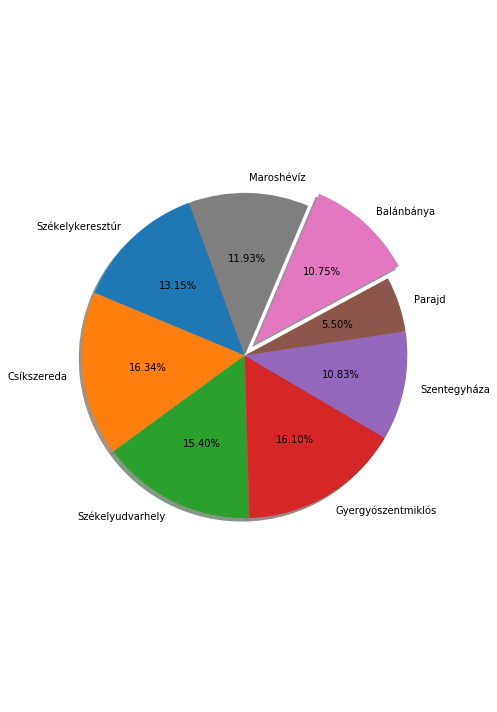

In [23]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Székelykeresztúr', 'Csíkszereda', 'Székelyudvarhely', 'Gyergyószentmiklós', 'Szentegyháza','Parajd' , 'Balánbánya', 'Maroshévíz'
sizes = [13.15, 16.34, 15.40, 16.10, 10.83, 5.50, 10.75, 11.93]
explode = (0, 0, 0, 0,0,0,0.1,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize = (7,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=110)
ax1.axis('equal')
plt.tight_layout()
plt.savefig('hr_born.jpg', dpi =200)
plt.show()

In [565]:
for i in range(len(hr_cities)):
    hr_cities[i] = hr_cities[i].lower()
hr_cities.append('miercurea ciuc')
hr_cities.append('balan')
print(hr_cities)

['cristuru secuiesc', 'miercurea-ciuc', 'odorheiu secuiesc', 'gheorgheni', 'vlăhița', 'bălan', 'toplița', 'praid', 'miercurea ciuc', 'miercurea ciuc', 'miercurea ciuc', 'miercurea ciuc', 'balan']


Finally, we get the data of those, who has been born in a Hospital situated in Harghita county(not all of them had residence in Harghita, for instance, many of those who had been born in Toplita did not grow up in Harghita, because the city is on the border of the county, just like Balan and Praid).

In [247]:
hr_livesin_geo = []
for i in range(len(hr_livesin)):
    hr_livesin_geo.append(decode(hr_livesin[i][0]))

In [566]:
hr_data = data

### 1.4. Extraining the data of those, who has born in Hargita county

In [567]:
for idx in range(len(data)):
    if (type(hr_data['birth'][idx]) == str):
        city = hr_data['birth'][idx]
        now_city = city.split(',')
        city_lang = check_lang(now_city[0])
        if city_lang not in hr_cities:
            hr_data = hr_data.drop(idx)
            

My region of interest is only Harghita county, that is why I created a new, specified database, containing the data only from Harghita county. It is not an efficient solution, but being at the very beginning of this, it works for me. :)

In [568]:
hr_data.to_json('hr2.json')
hr_data.to_csv('hrborn2.csv')
save = hr_data

In [569]:
hr_data = hr_data.reset_index(drop=True)


In [570]:
print(len(hr_data))

21496


In [609]:
fcities = []
for ids in range(len(hr_data)):
    if(type(hr_data['livesin'][ids])== str):
        city = hr_data['livesin'][ids]
        this_city = city.split(',')
        city_lang = check_lang(this_city[0])
        if city_lang not in hr_city:
            fcities.append(city_lang)
            

In [610]:
fncities = []
for i in range(len(fcities)):
    l = []
    l.append(fcities[i])
    l.append(1)
    fncities.append(l)

In [611]:
visited = set()
nr_fcities = []
for i in range(len(fncities)):
    first = True
    if fncities[i][0] not in visited:
        visited.add(fncities[i][0])
        for j in range(len(fncities)):
            if((fncities[i][0] == fncities[j][0]) and (first == True)):
                first = False
            elif((fncities[i][0] == fncities[j][0]) and (first == False)):
                fncities[i][1] +=1

In [612]:
fcities = []
visited = set()

for a,b in fncities:
    if not a in visited:
        visited.add(a)
        fcities.append([a,b]) 

Here we have the data of those, who has born in Harghita, and left the county. I extract the data of those, who has born in Balan, and save the remaining data in fcity.txt, together with the number of residents from Harghita. I know, that ".txt" format is not so efficient and it is oldschool, but I needed the data in readable format, and it was okey for me.

In [615]:
no_balan = []
fcities.sort(key=lambda x: x[1], reverse = True)
for l in fcities:
    if l[0] != 'balan':
        no_balan.append(l)
        
fcities = no_balan

In [253]:
for i in fcities[:30]:
    print(i)

['budapest', 869]
['cluj napoca', 812]
['targu mures', 600]
['bucharest', 194]
['london', 175]
['rome', 115]
['brasov', 113]
['sfantu gheorghe', 95]
['timisoara', 56]
['madrid', 46]
['bacau', 35]
['kecskemet', 34]
['nagy-varad', 34]
['reghin', 32]
['vienna', 32]
['szeged', 32]
['brasso', 31]
['oradea', 30]
['arad', 29]
['mosonmagyarovar', 29]
['sighișoara', 29]
['gyor', 28]
['sopron', 26]
['munich', 26]
['lajosmizse', 25]
['szekesfehervar', 25]
['debrecen', 25]
['porumbenii mari', 24]
['iasi', 24]
['erd', 22]


In [629]:
for l in fcities:
    fcity = open('fcity.txt', 'a')
    fcity.write(l[0])
    fcity.write(',')
    fcity.write(str(l[1]))
    fcity.write('\n')
    fcity.close()

In [2]:
fcities = []
fcity = open("fcity.txt", "r")
for line in fcity:
    city = line.split(',')
    fcities.append(city)
     

In [3]:
for l in fcities:
    l[1]= int(l[1])

## 2. Data Visualizations

Here I tried to create some data visualisations, and I must admit, that I need a lot of practice, to create something finer. 

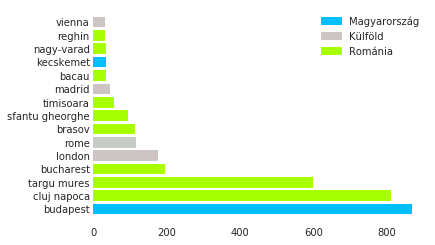

In [26]:
style.use('seaborn-white')
rcParams['font.family'] = 'Georgia'
vals = []
labels = []
cities = fcities[:15]
for i in cities:
    i[0] = i[0].lower()
    vals.append(i[1])
    labels.append(i[0])

colors = ['deepskyblue','#A8FF00', '#A8FF00', '#A8FF00', '#CCC5C3', '#C5CCC3', '#A8FF00', '#A8FF00', '#A8FF00', '#CCC5C3', '#A8FF00', 'deepskyblue', '#A8FF00',  '#A8FF00','#CCC5C3']
plt.axes(frameon = False)
plt.grid(False)
plt.barh(labels, vals, color=colors)
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='off')

blue_patch = mpatches.Patch(color='deepskyblue', label='Magyarország')
green_patch = mpatches.Patch(color='#A8FF00', label='Románia')
grey_patch = mpatches.Patch(color='#CCC5C3', label='Külföld')
plt.legend(handles=[blue_patch,grey_patch, green_patch])
plt.savefig('output/frcities.jpg', bbox_inches='tight', transparent=True, dpi=400)
plt.show()

Next I geocoded all the cities, which I got previously, because I wanted to created a geographical data visualization, showing the chosen cities by the emigrants of Harghita county.

In [15]:
geo_fcities = []
i = 1
for l in fcities:
    geo = []
    city = l[0]
    geo.append(decode(city))
    print(i, '---', geo)
    i +=1
    geo.append(l[1])
    geo_fcities.append(geo)

1 --- [[47.49972000000008, 19.055080000000032, 'Budapest']]
2 --- [[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']]
3 --- [[46.54257000000007, 24.55800000000005, 'Târgu Mureș']]
4 --- [[44.43429000000003, 26.10298000000006, 'Bucharest']]
5 --- [[51.50642000000005, -0.1272099999999341, 'London']]
6 --- [[41.90322000000003, 12.495650000000069, 'Rome']]
7 --- [[45.64268000000004, 25.58871000000005, 'Brașov']]
8 --- [[45.863420000000076, 25.804770000000076, 'Sfântu Gheorghe']]
9 --- [[45.75345000000004, 21.223330000000033, 'Timișoara']]
10 --- [[40.41955000000007, -3.6919599999999377, 'Madrid']]
11 --- [[46.56911000000008, 26.910980000000052, 'Bacău']]
12 --- [[46.90545000000003, 19.68772000000007, 'Kecskemét']]
13 --- [[47.066670000000045, 21.93333000000007, 'Nagy-Varad']]
14 --- [[46.78230000000008, 24.70193000000006, 'Reghin']]
15 --- [[48.202630000000056, 16.36842000000007, 'Vienna']]
16 --- [[46.25448000000006, 20.148560000000032, 'Szeged']]
17 --- [[45.64268000000004, 25.58871

137 --- [[47.53439000000003, 21.619080000000054, 'Debrecen']]
138 --- [[47.18781000000007, 23.05794000000003, 'Zalău']]
139 --- [[46.07092000000006, 23.58050000000003, 'Alba Iulia']]
140 --- [[44.178270000000055, 28.65115000000003, 'Constanța']]
141 --- [[47.53066000000007, 19.078500000000076, 'Angyalföld']]
142 --- [[52.01547000000005, 8.532310000000052, 'Bielefeld']]
143 --- [[42.465910000000065, -2.4519299999999475, 'Logroño']]
144 --- [[48.38194000000004, 17.58567000000005, 'Trnava']]
145 --- [[47.49013000000008, 19.33490000000006, 'Pécel']]
146 --- [[47.64384000000007, 19.030340000000024, 'Pomáz']]
147 --- [[-29.051979999999958, 23.773120000000063, 'Douglas']]
148 --- [[43.46354000000008, 11.877650000000074, 'Arezzo']]
149 --- [[47.188180000000045, 19.321470000000033, 'Dabas']]
150 --- [[51.23709000000008, -0.5704699999999434, 'Guildford']]
151 --- [[47.60051000000004, 19.35731000000004, 'Gödöllő']]
152 --- [[46.22693000000004, 27.670610000000067, 'Bârlad']]
153 --- [[47.800650000

270 --- [[41.651830000000075, -0.8811399999999594, 'Zaragoza']]
271 --- [[41.123050000000035, 15.28499000000005, 'Anzano di Puglia']]
272 --- [[46.52711000000005, 18.97670000000005, 'Kalocsa']]
273 --- [[43.70025000000004, 7.277740000000051, 'Nice']]
274 --- [[47.65519000000006, 19.287120000000073, 'Veresegyház']]
275 --- [[55.70664000000005, 13.187590000000057, 'Lund']]
276 --- [[56.16555000000005, 12.835710000000063, 'Strövelstorp']]
277 --- [[-24.20694999999995, -50.92573999999996, 'Ortigueira']]
278 --- [[45.26411000000007, 27.968810000000076, 'Brăila']]
279 --- [[48.70789000000008, 9.001970000000028, 'Sindelfingen']]
280 --- [[55.39618000000007, 10.390780000000063, 'Odense']]
281 --- [[46.94843000000003, 7.44046000000003, 'Bern']]
282 --- [[42.45290000000006, 11.422600000000045, 'Capalbio']]
283 --- [[50.000620000000026, 8.272410000000036, 'Mainz']]
284 --- [[46.33363000000003, 24.289390000000026, 'Târnăveni']]
285 --- [[44.41176000000007, 12.204060000000027, 'Ravenna']]
286 --- [

401 --- [[31.780030000000068, 35.21873000000005, 'Jerusalem']]
402 --- [[42.35866000000004, -71.05673999999993, 'Boston']]
403 --- [[47.22320000000008, 19.149910000000034, 'Bugyi']]
404 --- [[55.058520000000044, 8.951580000000035, 'Løgumkloster']]
405 --- [[46.76296000000008, 17.242560000000026, 'Keszthely']]
406 --- [[10.776430000000062, 106.70112000000006, 'Hồ Chí Minh']]
407 --- [[48.685370000000034, 9.009610000000066, 'Böblingen']]
408 --- [[52.55128000000008, 0.0885000000000673, 'March']]
409 --- [[45.51667000000003, 10.450000000000045, 'Carzago della Riviera']]
410 --- [[45.14241000000004, 10.015210000000025, 'Cremona']]
411 --- [[51.18244000000004, 3.0924000000000547, 'Jabbeke']]
412 --- [[47.47518000000008, 12.544850000000054, 'Fieberbrunn']]
413 --- [[52.52155000000005, 7.315860000000043, 'Lingen']]
414 --- [[47.73551000000003, 11.86280000000005, 'Schliersee']]
415 --- [[52.03003000000007, 11.427780000000041, 'Bottmersdorf']]
416 --- [[47.410090000000025, 15.268530000000055, '

533 --- [[45.194000000000074, 5.732010000000059, 'Grenoble']]
534 --- [[41.46719000000007, -82.01988999999998, 'Avon']]
535 --- [[40.65298000000007, -89.64930999999996, 'Bartonville']]
536 --- [[47.37520000000006, 9.549690000000055, 'Altstätten']]
537 --- [[45.73488000000003, 22.997430000000065, 'Călan']]
538 --- [[36.84191000000004, -2.463619999999935, 'Almería']]
539 --- [[47.47608000000008, 19.07710000000003, 'Ferencváros']]
540 --- [[47.755220000000065, 19.089720000000057, 'Tahitótfalu']]
541 --- [[55.12190000000004, 9.069100000000049, 'Branderup']]
542 --- [[51.396420000000035, 12.221870000000024, 'Schkeuditz']]
543 --- [[46.739910000000066, 27.76550000000003, 'Văleni']]
544 --- [[50.53818000000007, 8.043580000000077, 'Langendernbach']]
545 --- [[1.9029900000000453, 28.56642000000005, 'Aradi']]
546 --- [[48.904480000000035, 9.077680000000043, 'Markgröningen']]
547 --- [[46.208330000000046, 6.142750000000035, 'Geneva']]
548 --- [[50.94453000000004, 3.1231800000000476, 'Roeselare']]

665 --- [[53.90578000000005, 11.366530000000068, 'Proseken']]
666 --- [[47.016000000000076, 16.883940000000052, 'Olaszfa']]
667 --- [[48.10760000000005, 16.28622000000007, 'Brunn am Gebirge']]
668 --- [[49.86081000000007, 8.56415000000004, 'Griesheim']]
669 --- [[47.47658000000007, 18.51923000000005, 'Szár']]
670 --- [[40.92850000000004, 14.203670000000045, 'Giugliano in Campania']]
671 --- [[41.46273000000008, 12.905280000000062, 'Latina']]
672 --- [[48.15677000000005, 14.022140000000036, 'Wels']]
673 --- [[51.249690000000044, -0.7595199999999522, 'Aldershot']]
674 --- [[46.57854000000003, 24.55418000000003, 'Sântana de Mureș']]
675 --- [[45.73751000000004, 7.320720000000051, 'Aosta']]
676 --- [[52.50482000000005, -1.7628599999999324, 'Castle Bromwich']]
677 --- [[40.34773000000007, -4.02828999999997, 'Sevilla La Nueva']]
678 --- [[45.666360000000054, 12.241890000000069, 'Treviso']]
679 --- [[46.69128000000006, 19.20551000000006, 'Akasztó']]
680 --- [[50.87763000000007, 4.707190000000

795 --- [[36.30695000000003, 2.225750000000062, 'Miliana']]
796 --- [[42.200000000000045, -122.71730999999994, 'Ashland']]
797 --- [[48.95324000000005, 10.003550000000075, 'Adelmannsfelden']]
798 --- [[47.96614000000005, 17.288230000000055, 'Dunakiliti']]
799 --- [[46.407440000000065, 24.609500000000025, 'Coroisânmărtin']]
800 --- [[39.96199000000007, -83.00274999999993, 'Columbus']]
801 --- [[45.93874000000005, 20.526760000000024, 'Teremia Mare']]
802 --- [[47.77902000000006, 19.670690000000036, 'Zagyvaszántó']]
803 --- [[53.55347000000006, -1.4833699999999794, 'Barnsley']]
804 --- [[45.64268000000004, 25.58871000000005, 'Kronstadt']]
805 --- [[45.41304000000008, 19.890100000000075, 'Temerin']]
806 --- [[47.35061045000003, 7.3325700430000325, 'Delémont']]
807 --- [[45.037810000000036, 23.268830000000037, 'Târgu Jiu']]
808 --- [[51.41009000000008, -0.05682999999993399, 'Penge']]
809 --- [[40.30001000000004, -3.4406699999999546, 'Arganda del Rey']]
810 --- [[43.297660000000064, 13.45586

924 --- [[51.14663000000007, 0.8760300000000711, 'Ashford']]
925 --- [[46.12776000000008, 22.792310000000043, 'Brad']]
926 --- [[41.25927000000007, 13.612760000000037, 'Formia']]
927 --- [[48.66219427500005, 10.18183272400006, 'Heidenheim']]
928 --- [[34.56406000000004, -83.54602999999997, 'Demorest']]
929 --- [[47.525870000000054, 19.289250000000038, 'Nagytarcsa']]
930 --- [[55.61574000000007, 12.35125000000005, 'Ishøj']]
931 --- [[39.95222000000007, -75.16217999999998, 'Philadelphia']]
932 --- [[46.75143000000003, 19.477000000000032, 'Orgovány']]
933 --- [[41.75710000000004, -88.31612999999999, 'Aurora']]
934 --- [[46.366670000000056, 26.766670000000033, 'Drăgugeşti']]
935 --- [[46.62003000000004, 19.035820000000058, 'Szelid']]
936 --- [[47.52233000000007, 10.229160000000036, 'Gunzesried']]
937 --- [[47.20646000000005, 8.191950000000077, 'Beromünster']]
938 --- [[46.24029000000007, 18.692810000000065, 'Várdomb']]
939 --- [[47.033240000000035, 19.454830000000072, 'Ladánybene']]
940 --

1054 --- [[14.663278458000036, 120.44823658300004, 'Bataan']]
1055 --- [[46.91697000000005, 24.836930000000052, 'Rușii-Munți']]
1056 --- [[48.43119000000007, 11.59898000000004, 'Allershausen']]
1057 --- [[48.25816000000003, 16.397940000000062, 'Floridsdorf']]
1058 --- [[46.98905000000008, 13.169130000000052, 'Mallnitz']]
1059 --- [[46.257760000000076, 11.03490000000005, 'Campodenno']]
1060 --- [[45.91345000000007, 6.648400000000038, 'Domancy']]
1061 --- [[48.96162000000004, 9.12689000000006, 'Bietigheim-Bissingen']]
1062 --- [[40.48068000000006, -3.3734199999999532, 'Alcalá de Henares']]
1063 --- [[40.241259574000026, -0.14680532999994966, 'Castellón']]
1064 --- [[42.20184000000006, 12.87847000000005, 'Poggio Moiano']]
1065 --- [[39.437050000000056, -0.46545999999995047, 'Torrente']]
1066 --- [[47.052050000000065, 25.900600000000054, 'Grințieș']]
1067 --- [[45.601860000000045, 27.071890000000053, 'Urechești']]
1068 --- [[46.31134000000003, 10.732870000000048, 'Fucine']]
1069 --- [[35.8

1184 --- [[51.90428000000003, 4.167920000000038, 'Brielle']]
1185 --- [[37.37737000000004, -6.974439999999959, 'Gibraleón']]
1186 --- [[59.943610000000035, 10.947240000000022, 'Lørenskog']]
1187 --- [[35.043480000000045, 33.98917000000006, 'Paralimni']]
1188 --- [[45.96456000000006, 12.772020000000055, 'Zoppola']]
1189 --- [[21.02120000000008, -101.87716999999998, 'Farmasalu']]
1190 --- [[48.31486000000007, 18.087630000000047, 'Nitra']]
1191 --- [[46.83544000000006, 9.450990000000047, 'Domat/Ems']]
1192 --- [[41.77525000000003, 12.915960000000041, 'Valmontone']]
1193 --- [[47.003040000000055, 17.827660000000037, 'Hidegkút']]
1194 --- [[47.76177000000007, 18.54812000000004, 'Nyergesújfalu']]
1195 --- [[49.38393000000008, 8.298880000000054, 'Böhl-Iggelheim']]
1196 --- [[39.75518000000005, -3.854499999999973, 'Almonacid de Toledo']]
1197 --- [[47.96239000000003, 21.351020000000062, 'Tiszavasvári']]
1198 --- [[50.22447000000005, 9.35203000000007, 'Bad Orb']]
1199 --- [[31.327350000000024, 

1313 --- [[47.74794000000003, 20.51872000000003, 'Mezőszemere']]
1314 --- [[47.98739000000006, 20.333110000000033, 'Szarvaskő']]
1315 --- [[47.02270000000004, 26.822850000000074, 'Gherăești']]
1316 --- [[46.10673000000003, 18.533330000000035, 'Geresdlak']]
1317 --- [[51.79278000000005, -3.9883799999999496, 'Ammanford']]
1318 --- [[48.40238000000005, 12.762910000000034, 'Eggenfelden']]
1319 --- [[35.171970000000044, 33.36489000000006, 'Lefkoşa']]
1320 --- [[45.58019000000007, 10.437310000000025, 'Gavardo']]
1321 --- [[37.27564000000007, -76.71007999999995, 'Williamsburg']]
1322 --- [[12.368570000000034, -1.5270999999999617, 'Ouagadougou']]
1323 --- [[46.63034000000005, 18.283780000000036, 'Tamási']]
1324 --- [[53.648690000000045, -2.318519999999978, 'Ramsbottom']]
1325 --- [[51.46993000000003, 6.855160000000069, 'Oberhausen']]
1326 --- [[43.31352000000004, 13.309930000000065, 'Treia']]
1327 --- [[-38.52054999999996, 145.37327000000005, 'San Remo']]
1328 --- [[45.64599000000004, 24.23922

1443 --- [[52.04406000000006, 4.9467200000000275, 'Montfoort']]
1444 --- [[41.71917000000008, 13.614880000000028, 'Sora']]
1445 --- [[41.75631000000004, -2.472849999999937, 'Soria']]
1446 --- [[47.96139000000005, 11.777720000000045, 'Peiß']]
1447 --- [[46.501280000000065, 24.48983000000004, 'Cristești']]
1448 --- [[48.103590000000054, 13.150050000000022, 'Mattighofen']]
1449 --- [[47.43445000000003, 18.915040000000033, 'Törökbálint']]
1450 --- [[31.279930000000036, 121.15607000000011, 'Lüpu']]
1451 --- [[47.19452000000007, 7.6134400000000255, 'Subingen']]
1452 --- [[32.22177000000005, -110.96976999999998, 'Tucson']]
1453 --- [[44.753280000000075, 7.799120000000073, 'Sanfrè']]
1454 --- [[33.98171000000008, -117.37403999999998, 'Riverside']]
1455 --- [[31.895500000000027, 34.81131000000005, 'Rehovot']]
1456 --- [[49.64310000000006, 8.639060000000029, 'Heppenheim']]
1457 --- [[47.73157000000003, 18.69315000000006, 'Tokodaltáró']]
1458 --- [[52.28920000000005, -1.5352999999999497, 'Leaming

1574 --- [[46.69690000000003, 19.026260000000036, 'Harta']]
1575 --- [[47.236050000000034, 16.866570000000024, 'Csénye']]
1576 --- [[47.31435000000005, 17.604930000000024, 'Ugod']]
1577 --- [[46.745220000000074, 17.74736000000007, 'Látrány']]
1578 --- [[49.01094000000006, 8.408450000000073, 'Karlsruhe']]
1579 --- [[46.77670000000006, 21.447200000000066, 'Méhkerék']]
1580 --- [[49.034560000000056, 8.706570000000056, 'Bretten']]
1581 --- [[42.33168000000006, -83.04799999999994, 'Detroit']]
1582 --- [[47.21667000000008, 22.400000000000034, 'Voivozi']]
1583 --- [[49.74640000000005, 13.384050000000059, 'Plzeň']]
1584 --- [[52.804440000000056, -1.6479099999999676, 'Burton upon Trent']]
1585 --- [[47.825540000000046, 11.49786000000006, 'Berg']]
1586 --- [[46.94309000000004, 17.079830000000072, 'Zalaszentgrót']]
1587 --- [[49.96457000000004, 6.707490000000064, 'Binsfeld']]
1588 --- [[45.06235000000004, 7.67993000000007, 'Torino']]
1589 --- [[42.68139000000008, 11.716210000000046, 'Sorano']]
15

1703 --- [[30.049920000000043, 31.248600000000067, 'Cairo']]
1704 --- [[45.393020000000035, 25.539360000000045, 'Bușteni']]
1705 --- [[51.881590000000074, -0.41610999999994647, 'Luton']]
1706 --- [[52.39778000000007, 9.59241000000003, 'Seelze']]
1707 --- [[47.41170000000005, 10.27735000000007, 'Oberstdorf']]
1708 --- [[37.94745000000006, 23.637080000000026, 'Piraeus']]
1709 --- [[40.577530000000024, 16.755570000000034, 'Ginosa']]
1710 --- [[45.00243000000006, 26.44238000000007, 'Mizil']]
1711 --- [[48.32242000000008, 10.045900000000074, 'Senden']]
1712 --- [[56.24272000000008, 12.862790000000075, 'Ängelholm']]
1713 --- [[68.69575000000003, 15.41306000000003, 'Sortland']]
1714 --- [[48.626630000000034, 9.341920000000073, 'Nürtingen']]
1715 --- [[48.07269000000008, 8.740040000000022, 'Spaichingen']]
1716 --- [[47.21811000000008, -1.5530599999999595, 'Nantes']]
1717 --- [[-11.787619999999947, -75.47636999999997, 'Sausa']]
1718 --- [[44.82163000000003, 26.413130000000024, 'Ciorani']]
1719 

1832 --- [[47.250530000000026, 8.766940000000034, 'Hombrechtikon']]
1833 --- [[47.72750000000008, 19.771330000000034, 'Ecséd']]
1834 --- [[7.666670000000067, 81.75000000000006, 'Palamunai']]
1835 --- [[46.53980000000007, 20.10074000000003, 'Baks']]
1836 --- [[47.02511000000004, 18.943250000000035, 'Szentháromság tér']]
1837 --- [[52.35887000000008, 16.516460000000052, 'Buk']]
1838 --- [[53.17966000000007, -6.7989599999999655, 'Newbridge']]
1839 --- [[42.96642000000003, -85.67194999999998, 'Grand Rapids']]
1840 --- [[47.21151000000003, 8.364590000000021, 'Auw']]
1841 --- [[47.697700000000054, 17.54147000000006, 'Abda']]
1842 --- [[47.01667000000003, 22.383330000000058, 'Peştere']]
1843 --- [[38.54621000000003, 28.645440000000065, 'Kula']]
1844 --- [[41.167020000000036, -4.121909999999957, 'Escalona del Prado']]
1845 --- [[44.731400000000065, 11.290460000000053, 'Cento']]
1846 --- [[45.96013000000005, 17.466720000000066, 'Barcs']]
1847 --- [[46.29308000000003, 28.14501000000007, 'Fălciu'

In [21]:
for l in geo_fcities:
    print(l)

[[47.49972000000008, 19.055080000000032, 'Budapest'], 869]
[[46.76870000000008, 23.584960000000024, 'Cluj-Napoca'], 812]
[[46.54257000000007, 24.55800000000005, 'Târgu Mureș'], 600]
[[44.43429000000003, 26.10298000000006, 'Bucharest'], 194]
[[51.50642000000005, -0.1272099999999341, 'London'], 175]
[[41.90322000000003, 12.495650000000069, 'Rome'], 115]
[[45.64268000000004, 25.58871000000005, 'Brașov'], 113]
[[45.863420000000076, 25.804770000000076, 'Sfântu Gheorghe'], 95]
[[45.75345000000004, 21.223330000000033, 'Timișoara'], 56]
[[40.41955000000007, -3.6919599999999377, 'Madrid'], 46]
[[46.56911000000008, 26.910980000000052, 'Bacău'], 35]
[[46.90545000000003, 19.68772000000007, 'Kecskemét'], 34]
[[47.066670000000045, 21.93333000000007, 'Nagy-Varad'], 34]
[[46.78230000000008, 24.70193000000006, 'Reghin'], 32]
[[48.202630000000056, 16.36842000000007, 'Vienna'], 32]
[[46.25448000000006, 20.148560000000032, 'Szeged'], 32]
[[45.64268000000004, 25.58871000000005, 'Brassó'], 31]
[[47.05184000

In [23]:
coordinates = []
numbers = []
for line in geo_fcities:
    try:
        coordinate = (line[0][0], line[0][1])
        coordinates.append(coordinate)
        numbers.append(line[1])
    except TypeError:
        continue

In [25]:
print(len(coordinates))
print(len(numbers))

1855
1855


In [28]:
import reverse_geocode

In [29]:
countries = reverse_geocode.search(coordinates)

In [31]:
for k in range(len(countries)):
    countries[k]['number'] = numbers[k]

In [32]:
normal = []
for c in countries:
    normal.append(c.items())

Counting the number of residents in different countries

In [33]:
onemore = []
for n in normal:
    one = list(n)
    onemore.append(one)
    
to_list = []
for o in onemore:
    l = []
    l.append(list(o[2]))
    l.append(list(o[3]))
    to_list.append(l)
    
visited = set()
for i in range(len(to_list)):
    first = True
    if to_list[i][0][1] not in visited:
        visited.add(to_list[i][0][1])
        for j in range(len(to_list)):
            if((to_list[i][0][1] == to_list[j][0][1]) and (first == True)):
                first = False
            elif((to_list[i][0][1] == to_list[j][0][1]) and (first == False)):
                to_list[i][1][1] += to_list[j][1][1]
                print(i+1, "---", to_list[i][0], "->", to_list[i][1][1])

1 --- ['country', 'Hungary'] -> 903
1 --- ['country', 'Hungary'] -> 904
1 --- ['country', 'Hungary'] -> 933
1 --- ['country', 'Hungary'] -> 934
1 --- ['country', 'Hungary'] -> 960
1 --- ['country', 'Hungary'] -> 985
1 --- ['country', 'Hungary'] -> 1010
1 --- ['country', 'Hungary'] -> 1016
1 --- ['country', 'Hungary'] -> 1018
1 --- ['country', 'Hungary'] -> 1019
1 --- ['country', 'Hungary'] -> 1021
1 --- ['country', 'Hungary'] -> 1037
1 --- ['country', 'Hungary'] -> 1050
1 --- ['country', 'Hungary'] -> 1061
1 --- ['country', 'Hungary'] -> 1072
1 --- ['country', 'Hungary'] -> 1083
1 --- ['country', 'Hungary'] -> 1094
1 --- ['country', 'Hungary'] -> 1104
1 --- ['country', 'Hungary'] -> 1113
1 --- ['country', 'Hungary'] -> 1122
1 --- ['country', 'Hungary'] -> 1131
1 --- ['country', 'Hungary'] -> 1140
1 --- ['country', 'Hungary'] -> 1149
1 --- ['country', 'Hungary'] -> 1150
1 --- ['country', 'Hungary'] -> 1151
1 --- ['country', 'Hungary'] -> 1159
1 --- ['country', 'Hungary'] -> 1167
1 --- [

2 --- ['country', 'Romania'] -> 1419
2 --- ['country', 'Romania'] -> 1420
2 --- ['country', 'Romania'] -> 1421
2 --- ['country', 'Romania'] -> 1422
2 --- ['country', 'Romania'] -> 1423
2 --- ['country', 'Romania'] -> 1424
2 --- ['country', 'Romania'] -> 1425
2 --- ['country', 'Romania'] -> 1426
2 --- ['country', 'Romania'] -> 1427
2 --- ['country', 'Romania'] -> 1428
2 --- ['country', 'Romania'] -> 1429
2 --- ['country', 'Romania'] -> 1430
2 --- ['country', 'Romania'] -> 1431
2 --- ['country', 'Romania'] -> 1432
2 --- ['country', 'Romania'] -> 1433
2 --- ['country', 'Romania'] -> 1434
2 --- ['country', 'Romania'] -> 1435
2 --- ['country', 'Romania'] -> 1436
2 --- ['country', 'Romania'] -> 1437
2 --- ['country', 'Romania'] -> 1438
2 --- ['country', 'Romania'] -> 1439
2 --- ['country', 'Romania'] -> 1440
2 --- ['country', 'Romania'] -> 1441
2 --- ['country', 'Romania'] -> 1442
2 --- ['country', 'Romania'] -> 1443
2 --- ['country', 'Romania'] -> 1444
2 --- ['country', 'Romania'] -> 1445
2

15 --- ['country', 'Austria'] -> 68
15 --- ['country', 'Austria'] -> 69
15 --- ['country', 'Austria'] -> 70
15 --- ['country', 'Austria'] -> 71
15 --- ['country', 'Austria'] -> 72
15 --- ['country', 'Austria'] -> 73
15 --- ['country', 'Austria'] -> 74
15 --- ['country', 'Austria'] -> 75
15 --- ['country', 'Austria'] -> 76
15 --- ['country', 'Austria'] -> 77
15 --- ['country', 'Austria'] -> 78
15 --- ['country', 'Austria'] -> 79
24 --- ['country', 'Germany'] -> 46
24 --- ['country', 'Germany'] -> 57
24 --- ['country', 'Germany'] -> 68
24 --- ['country', 'Germany'] -> 77
24 --- ['country', 'Germany'] -> 85
24 --- ['country', 'Germany'] -> 92
24 --- ['country', 'Germany'] -> 93
24 --- ['country', 'Germany'] -> 100
24 --- ['country', 'Germany'] -> 106
24 --- ['country', 'Germany'] -> 111
24 --- ['country', 'Germany'] -> 116
24 --- ['country', 'Germany'] -> 120
24 --- ['country', 'Germany'] -> 124
24 --- ['country', 'Germany'] -> 128
24 --- ['country', 'Germany'] -> 132
24 --- ['country', '

143 --- ['country', 'Slovakia'] -> 17
143 --- ['country', 'Slovakia'] -> 18
143 --- ['country', 'Slovakia'] -> 19
143 --- ['country', 'Slovakia'] -> 20
146 --- ['country', 'South Africa'] -> 6
146 --- ['country', 'South Africa'] -> 7
146 --- ['country', 'South Africa'] -> 8
155 --- ['country', 'United Arab Emirates'] -> 7
155 --- ['country', 'United Arab Emirates'] -> 8
159 --- ['country', 'Cyprus'] -> 7
159 --- ['country', 'Cyprus'] -> 8
159 --- ['country', 'Cyprus'] -> 10
159 --- ['country', 'Cyprus'] -> 11
159 --- ['country', 'Cyprus'] -> 12
159 --- ['country', 'Cyprus'] -> 13
159 --- ['country', 'Cyprus'] -> 14
159 --- ['country', 'Cyprus'] -> 15
202 --- ['country', 'Croatia'] -> 5
224 --- ['country', 'Czech Republic'] -> 5
224 --- ['country', 'Czech Republic'] -> 6
224 --- ['country', 'Czech Republic'] -> 7
229 --- ['country', 'India'] -> 6
229 --- ['country', 'India'] -> 8
229 --- ['country', 'India'] -> 10
229 --- ['country', 'India'] -> 11
229 --- ['country', 'India'] -> 12
229

In [34]:
country_number = []
visited = set()

for a,b in to_list:
    if not a[1] in visited:
        visited.add(a[1])
        country_number.append((a[1],b[1]))  

In [35]:
country_number.sort(key =lambda x:x[1],reverse = True)
for cn in country_number:
    print(cn)

('Hungary', 1754)
('Romania', 1552)
('Italy', 456)
('Germany', 446)
('United Kingdom', 408)
('Spain', 149)
('United States', 124)
('Switzerland', 99)
('Austria', 79)
('France', 75)
('Sweden', 65)
('Denmark', 47)
('Canada', 37)
('Norway', 32)
('Netherlands', 28)
('Greece', 22)
('Belgium', 21)
('Iraq', 20)
('Slovakia', 20)
('Congo, The Democratic Republic of the', 19)
('India', 19)
('Ireland', 15)
('Cyprus', 15)
('Indonesia', 12)
('Mexico', 10)
('Poland', 9)
('Israel', 9)
('South Africa', 8)
('United Arab Emirates', 8)
('Turkey', 8)
('Portugal', 8)
('Czech Republic', 7)
('Brazil', 7)
('Philippines', 7)
('Australia', 7)
('Croatia', 5)
('Russian Federation', 5)
('Ethiopia', 4)
('Argentina', 4)
('Vietnam', 4)
('New Zealand', 4)
('Moldova, Republic of', 4)
('Uganda', 4)
('Nigeria', 4)
('Libyan Arab Jamahiriya', 3)
('Bosnia and Herzegovina', 3)
('Cuba', 3)
('Papua New Guinea', 3)
('Pakistan', 3)
('Peru', 3)
('China', 3)
('Egypt', 3)
('Belarus', 2)
('Syrian Arab Republic', 2)
('Latvia', 2)
('M

Here has happened something I cannot explain yet, because first I found 21496 born in Harghita, but after making through once again the dataset, I got only 19184 persons. If I had time, I would check the problem. Well, I have found the mistake, somehow, Balan/Balánbánya was not considered, although it was specified my list with possible places to offer place to be born. Nevermind, it was corrected!

In [333]:
nr = 0
#here I made a huge mistake....I translated every location, even if
#I had locations with multiple appearance...NEVER DO THIS
#because you will wait 50-70 minutes to finish a sequence of code....
migrated = []
for ids in range(len(hr_data)):
    if(type(hr_data['livesin'][ids])== str):
        city = hr_data['livesin'][ids]
        this_city = city.split(',')
        city_lang = check_lang(this_city[0])
        if city_lang not in hr_city:
            geo = decode(city_lang)
            print(geo)
            migrated.append(geo)
            nr += 1
            

[47.53066000000007, 19.078500000000076, 'Angyalföld']
[16.499640000000056, 120.6795800000001, 'Bokod']
[40.89679000000007, -74.09466999999995, 'Saddle Brook']
[52.79004000000003, 7.245000000000061, 'Haren']
[47.49972000000008, 19.055080000000032, 'Budapest']
[51.50642000000005, -0.1272099999999341, 'London']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[51.04532000000006, -114.06300999999996, 'Calgary']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[44.43429000000003, 26.10298000000006, 'Bucharest']
[41.64193000000006, 12.916570000000036, 'Cori']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[37.94020000000006, 22.934510000000046, 'Korinthos']
[47.48812000000004, 18.31651000000005, 'Oroszlány']
[52.08409000000006, 4.317320000000052, 'The Hague'

[47.64384000000007, 19.030340000000024, 'Pomáz']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[47.75588000000005, 7.57594000000006, 'Schliengen']
[59.33257000000003, 18.06683000000004, 'Stockholm']
[47.385110000000054, 9.278180000000077, 'Herisau']
[47.49972000000008, 19.055080000000032, 'Budapest']
[51.450150000000065, 0.3085500000000252, 'Swanscombe']
[47.49972000000008, 19.055080000000032, 'Budapest']
[56.043990000000065, 12.696110000000033, 'Helsingborg']
[47.49972000000008, 19.055080000000032, 'Budapest']
[47.49972000000008, 19.055080000000032, 'Budapest']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[41.01384000000007, 28.94966000000005, 'İstanbul']
[47.49972000000008, 19.055080000000032, 'Budapest']
[46.322820000000036, 19.131950000000074, 'Szentgyörgy']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[45.46796000000006, 9.18178000000006, 'Milan'

[45.64268000000004, 25.58871000000005, 'Brașov']
[54.679950000000076, 9.834990000000062, 'Arrild']
[48.25941000000006, 11.434340000000077, 'Dachau']
[46.17720000000003, 18.951940000000036, 'Baja']
[47.49972000000008, 19.055080000000032, 'Budapest']
[45.879980000000046, 22.902100000000075, 'Deva']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[47.49972000000008, 19.055080000000032, 'Budapest']
[47.17735000000005, 20.19431000000003, 'Szolnok']
[47.188180000000045, 19.321470000000033, 'Dabas']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[50.11208000000005, 8.683410000000038, 'Frankfurt']
[52.08552000000003, 4.887590000000046, 'Woerden']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[47.62912000000006, 19.141020000000026, 'Dunakeszi']
[53.86627000000004, 10.68082000000004, 'Lübeck']
[47.31803000000008, 18.909100000000024, 'Százhalombatta']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[51.930920000000

[49.36627000000004, 8.308340000000044, 'Iggelheim']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[47.49972000000008, 19.055080000000032, 'Budapest']
[47.66574000000003, 19.07821000000007, 'Szentendre']
[47.59585000000004, 20.05185000000006, 'Tarnaörs']
[46.29030000000006, 23.81803000000008, 'Lopadea Nouă']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[40.714500000000044, -74.00600999999995, 'Manhattan']
[44.43429000000003, 26.10298000000006, 'Bucharest']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[51.50642000000005, -0.1272099999999341, 'London']
[46.95232000000004, 25.268110000000036, 'Ciobotani']
[47.36630000000008, 18.866760000000056, 'Tárnok']
[51.23709000000008, -0.5704699999999434, 'Guildford']
[48.202630000000056, 16.36842000000007, 'Vienna']
[47.49972000000008, 19.055080000000032, 'Budapest']
[47.85678000000007, 19.10543000000007, 'Szendehely']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[47.53439000000003, 21.619080000000054, 'Debrecen']

[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[51.11375000000004, -0.6277399999999602, 'Chiddingfold']
[25.269510000000025, 55.30884000000003, 'Dubai']
[47.49972000000008, 19.055080000000032, 'Budapest']
[47.49972000000008, 19.055080000000032, 'Budapest']
[47.49972000000008, 19.055080000000032, 'Budapest']
[45.75345000000004, 21.223330000000033, 'Timișoara']
[47.37808000000007, 19.219570000000033, 'Gyál']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[39.571480000000065, 2.646940000000029, 'Palma de Mallorca']
[52.52155000000005, 7.315860000000043, 'Lingen']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[45.53689000000003, 10.232000000000028, 'Brescia']
[47.73551000000003, 11.86280000000005, 'Schliersee']
[47.49972000000008, 19.055080000000032, 'Budapest']
[46.073090000000036, 18.228750000000048, 'Pécs']
[47.49972000000008, 19.055080000000032, 'Budapest']
[47.49972000000008, 19.055080000000032, 'Budapest']
[47.49972000000008, 19.055080000000032, 'Budapest']
[3

[9.716670000000022, 12.716670000000022, 'Dallok']
[47.49972000000008, 19.055080000000032, 'Budapest']
[48.06749000000008, 20.63178000000005, 'Bükkszentkereszt']
[46.61817000000008, 13.849770000000035, 'Villach']
[51.50642000000005, -0.1272099999999341, 'London']
[44.43429000000003, 26.10298000000006, 'Bucharest']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[41.90322000000003, 12.495650000000069, 'Rome']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[47.49972000000008, 19.055080000000032, 'Budapest']
[47.49972000000008, 19.055080000000032, 'Budapest']
[47.10682000000003, 17.56397000000004, 'Ajka']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[47.49972000000008, 19.055080000000032, 'Budapest']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[47.49972000000008, 19.055080000000032, 'Budapest']
[47.49972000000008, 19.055080000000032, 'Budapest']
[

[51.41009000000008, -0.05682999999993399, 'Penge']
[46.94843000000003, 7.44046000000003, 'Bern']
[47.092520000000036, 17.907750000000078, 'Veszprém']
[47.49972000000008, 19.055080000000032, 'Budapest']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[47.49972000000008, 19.055080000000032, 'Budapest']
[45.93147000000005, 22.656330000000025, 'Rechinul']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[25.269510000000025, 55.30884000000003, 'Dubai']
[47.959280000000035, 21.71831000000003, 'Nyíregyháza']
[44.73470000000003, 21.665580000000034, 'Moldova Nouă']
[45.863420000000076, 25.804770000000076, 'Sfântu Gheorghe']
[45.64268000000004, 25.58871000000005, 'Brassó']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[46.22124000000008, 24.794580000000053, 'Sighișoara']
[47.092520000000036, 17.907750000000078, 'Veszprém']
[50.000620000000026, 8.272410000000036, 'Mainz

[54.36331000000007, -2.918589999999938, 'Bowness-on-Windermere']
[48.36211000000003, 8.631020000000035, 'Sulz am Neckar']
[46.90545000000003, 19.68772000000007, 'Kecskemét']
[47.16186000000005, 19.401000000000067, 'Hernád']
[47.49972000000008, 19.055080000000032, 'Budapest']
[51.20896000000005, 10.452750000000037, 'Mühlhausen']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[50.08466000000004, 8.242140000000063, 'Wiesbaden']
[40.30491000000006, -3.731079999999963, 'Getafe']
[47.02631000000008, 19.55767000000003, 'Lajosmizse']
[51.955310000000054, 10.759120000000053, 'Berßel']
[47.49972000000008, 19.055080000000032, 'Budapest']
[48.202630000000056, 16.36842000000007, 'Vienna']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[48.202630000000056, 16.36842000000007, 'Vienna']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[47.49972000000008, 19.055080000000032, 'Budapest']
[47.377680000000055, 18.919760000000053, '

[47.49972000000008, 19.055080000000032, 'Budapest']
[47.49972000000008, 19.055080000000032, 'Budapest']
[54.869440000000054, -6.276249999999948, 'Ballymena']
[47.49972000000008, 19.055080000000032, 'Budapest']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[48.10557000000006, 20.790580000000034, 'Miskolc']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[41.90322000000003, 12.495650000000069, 'Rome']
[46.25448000000006, 20.148560000000032, 'Szeged']
[47.34704000000005, 25.359290000000044, 'Vatra Dornei']
[47.964150363000044, 13.533008808000034, 'Vöcklabruck']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[40.71455000000003, -74.00713999999994, 'New York']
[45.64268000000004, 25.58871000000005, 'Brașov']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[47.13097000000005, 24.48992000000004, 'Bistrița']
[47.49972000000008, 19.055080000000032, 'Budapest']
[24.90560000000005, 67.08220000000006, 'Karachi']
[

[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[47.49972000000008, 19.055080000000032, 'Budapest']
[47.401410000000055, 19.625330000000076, 'Tápióság']
[48.801720000000046, 9.014310000000023, 'Leonberg']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[52.05791000000005, 1.1454400000000646, 'Ipswich']
[47.64384000000007, 19.030340000000024, 'Pomáz']
[47.49972000000008, 19.055080000000032, 'Budapest']
[48.202630000000056, 16.36842000000007, 'Vienna']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[55.48636000000005, 9.473350000000039, 'Kolding']
[47.36630000000008, 18.866760000000056, 'Tárnok']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[39.08844000000005, -0.4746299999999337, 'La Pobla Llarga']
[47.66566000000006, 8.981930000000034, 'Steckborn']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[47.49972000000008, 19.055080000000032, 'Budapest']
[46.76870000000008, 23.584960000000024, 'Cluj-Nap

[34.56406000000004, -83.54602999999997, 'Demorest']
[47.525870000000054, 19.289250000000038, 'Nagytarcsa']
[47.49972000000008, 19.055080000000032, 'Budapest']
[45.43368000000004, 28.05475000000007, 'Galați']
[55.61574000000007, 12.35125000000005, 'Ishøj']
[47.87561000000005, 17.268160000000023, 'Mosonmagyaróvár']
[33.74831000000006, -84.39110999999997, 'Atlanta']
[46.75143000000003, 19.477000000000032, 'Orgovány']
[51.50642000000005, -0.1272099999999341, 'London']
[44.43429000000003, 26.10298000000006, 'Bucharest']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[46.62003000000004, 19.035820000000058, 'Szelid']
[46.21557000000007, 20.474780000000067, 'Makó']
[47.52233000000007, 10.229160000000036, 'Gunzesried']
[51.50642000000005, -0.1272099999999341, 'London']
[46.925140000000056, 26.929280000000063, 'Roman']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[47.68140000000005, 16.593330000000037, 'Sopron']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[47.206460000

[47.49972000000008, 19.055080000000032, 'Budapest']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[48.202630000000056, 16.36842000000007, 'Vienna']
None
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[47.55698000000007, 19.278090000000077, 'Kerepes']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[47.53073000000006, 19.400090000000034, 'Isaszeg']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[47.66574000000003, 19.07821000000007, 'Szentendre']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[51.50642000000005, -0.1272099999999341, 'London']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[51.453790000000026, -2.59167999999994, 'Bristol']
[47.49972000000008, 19.055080000000032, 'Budapest']
[59.91234000000003, 10.750000000000057, 'Oslo']
[47.28227000000004, 20.383660000000077, 'Csataszög']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[47.18781000000007, 23.05794000000003, 'Zalău']
[51.345200000000034, 12.385940000000062, 'Leipzig']
[

[51.50642000000005, -0.1272099999999341, 'London']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[47.49972000000008, 19.055080000000032, 'Budapest']
[28.41426000000007, -16.546779999999956, 'Puerto de la Cruz']
[47.40844000000004, 19.016470000000027, 'Budatétény']
[47.720920000000035, 12.873920000000055, 'Bad Reichenhall']
[45.863420000000076, 25.804770000000076, 'Sfântu Gheorghe']
[45.64268000000004, 25.58871000000005, 'Brașov']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[46.180660000000046, 21.32209000000006, 'Arad']
[47.37707000000006, 8.539560000000051, 'Zürich']
[44.43429000000003, 26.10298000000006, 'Bucharest']
[46.519600000000025, 6.632220000000075, 'Lausanne']
[48.06841000000003, 19.62447000000003, 'Nógrádmegyer']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[47.49972000000008, 19.05508

[46.688030000000026, 19.68494000000004, 'Bugac']
[44.848520000000065, 11.068800000000067, 'Medolla']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[66.01721000000003, 12.635560000000055, 'Sandnessjøen']
[47.443850000000054, 21.389190000000042, 'Hajdúszoboszló']
[47.49972000000008, 19.055080000000032, 'Budapest']
[47.49972000000008, 19.055080000000032, 'Budapest']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[47.18874000000005, 18.414060000000063, 'Székesfehérvár']
[47.13097000000005, 24.48992000000004, 'Bistrița']
[46.68211000000008, 21.100130000000036, 'Békéscsaba']
[50.84439000000003, 4.3560900000000515, 'Brussels']
[47.18874000000005, 18.414060000000063, 'Székesfehérvár']
[49.17649000000006, 12.855150000000037, 'Kötzting']
[32.89534000000003, 13.181050000000027, 'Tripoli']
[48.14924000000008, 17.106990000000053, 'Bratislava']
[47.49972000000008, 19.055080000000032, 'Budapest']
[45.64268000000004, 25.58871000000005, 'Brașov']
[47.49972000000008, 19.055080000000032, 

[51.50642000000005, -0.1272099999999341, 'London']
[47.49972000000008, 19.055080000000032, 'Budapest']
[46.91667000000007, 26.333330000000046, 'Piatra Neamţ']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[47.066670000000045, 21.93333000000007, 'Nagy-Varad']
[47.09901000000008, 8.204270000000065, 'Neuenkirch']
[47.284530000000075, 8.042320000000075, 'Staffelbach']
[45.75345000000004, 21.223330000000033, 'Timișoara']
[44.43429000000003, 26.10298000000006, 'Bucharest']
[41.90322000000003, 12.495650000000069, 'Rome']
[51.50642000000005, -0.1272099999999341, 'London']
[46.91697000000005, 24.836930000000052, 'Rușii-Munți']
[47.49972000000008, 19.055080000000032, 'Budapest']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[46.25448000000006, 20.148560000000032, 'Szeged']
[45.46796000000006, 9.18178000000006, 'Milan']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[47.37808000000007, 19.219570000000033, 'Gyál']
[47

[43.261970000000076, -79.88799999999998, 'Hamilton']
[45.863420000000076, 25.804770000000076, 'Sfântu Gheorghe']
[46.96972000000005, 16.406990000000064, 'Vasszentmihály']
[44.41176000000007, 12.204060000000027, 'Ravenna']
[46.906960000000026, 18.05502000000007, 'Siófok']
[47.49972000000008, 19.055080000000032, 'Budapest']
[47.49972000000008, 19.055080000000032, 'Budapest']
[47.18874000000005, 18.414060000000063, 'Székesfehérvár']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[46.41673000000003, 20.32860000000005, 'Hódmezővásárhely']
[45.84310000000005, 24.975840000000062, 'Făgăraș']
[47.49972000000008, 19.055080000000032, 'Budapest']
[47.56204000000008, 9.045480000000055, 'Bissegg']
[47.683820000000026, 17.63567000000006, 'Győr']
[53.21520000000004, -3.047369999999944, 'Connahs Quay']
[38.916390000000035, 20.886390000000063, 'Vónitsa']
[46.25448000000006, 20.148560000000032, 'Szeged']
[47.49972000000008, 19.055080000000032,

[41.46719000000007, -82.01988999999998, 'Avon']
[51.51661000000007, 7.458290000000034, 'Dortmund']
[46.65196000000003, 20.258070000000032, 'Szentes']
[46.36293000000006, 17.672100000000057, 'Kaposfő']
[47.18874000000005, 18.414060000000063, 'Székesfehérvár']
[46.52489000000003, 19.254630000000077, 'Kecel']
[41.05195000000003, -73.54221999999999, 'Stamford']
[46.90545000000003, 19.68772000000007, 'Kecskemét']
[40.65298000000007, -89.64930999999996, 'Bartonville']
[46.25448000000006, 20.148560000000032, 'Szeged']
[47.21252000000004, 19.546850000000063, 'Dánszentmiklós']
[49.23173000000003, 6.998490000000061, 'Saarbrücken']
[39.46894000000003, -0.3768599999999651, 'València']
[59.16787000000005, 5.87569000000002, 'Finnøy']
[46.25448000000006, 20.148560000000032, 'Szeged']
[47.05184000000003, 21.938730000000078, 'Oradea']
[51.50642000000005, -0.1272099999999341, 'London']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[47.49972000000008, 19.055080000000032, 'Budapest']
[46.76870000

[48.87656000000004, 9.075120000000027, 'Schwieberdingen']
[47.682210000000055, 22.46669000000003, 'Carei']
[51.86217000000005, 13.951680000000067, 'Lübbenau']
[47.49972000000008, 19.055080000000032, 'Budapest']
[48.03461000000004, 15.77353000000005, 'Hainfeld']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[47.13097000000005, 24.48992000000004, 'Bistrița']
[47.18874000000005, 18.414060000000063, 'Székesfehérvár']
[47.49972000000008, 19.055080000000032, 'Budapest']
[47.64491000000004, 19.978140000000053, 'Jászárokszállás']
[53.410060000000044, -2.978429999999946, 'Liverpool']
[47.49972000000008, 19.055080000000032, 'Budapest']
[45.46796000000006, 9.18178000000006, 'Milan']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[47.53066000000007, 19.078500000000076, 'Angyalföld']
[52.51621000000006, 6.0924700000000485, 'Zwolle']
[46.76870000000008, 23.584960000000024, 'C

[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[59.33257000000003, 18.06683000000004, 'Stockholm']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[46.88274000000007, 17.439770000000067, 'Tapolca']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[55.058520000000044, 8.951580000000035, 'Løgumkloster']
[47.49972000000008, 19.055080000000032, 'Budapest']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[51.50642000000005, -0.1272099999999341, 'London']
[45.863420000000076, 25.804770000000076, 'Sfântu Gheorghe']
[48.31486000000007, 18.087630000000047, 'Nitra']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[46.83544000000006, 9.450990000000047, 'Domat/Ems']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[47.49972000000008, 19.055080000000032, 'Budapest']
[47.003040000000055, 17.827660000000037, 'Hidegkút']
[45.879980000000046, 22.902100000000075, 'Deva']
[45.75345000000004, 21.223330000000033, 'Timișoara']
[47.785960000000046, 18.87277000000006, 'Pil

[48.68834000000004, 9.16903000000002, 'Leinfelden-Echterdingen']
[47.77942000000007, 19.70550000000003, 'Petőfibánya']
[48.80647000000005, 12.425380000000075, 'Hainsbach']
[46.593560000000025, 25.072600000000023, 'Sovata']
[47.49972000000008, 19.055080000000032, 'Budapest']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[46.64954000000006, 25.812590000000057, 'Bălan']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[53.410060000000044, -2.978429999999946, 'Liverpool']
[44.43429000000003, 26.10298000000006, 'Bucharest']
[49.42897000000005, 8.313630000000046, 'Dannstadt']
[51.43324050000001, 6.853441500000001, 'Moselstraße']
[47.49972000000008, 19.055080000000032, 'Budapest']
[46.34821000000005, 17.974380000000053, 'Kőrös Patak']
[50.941670000000045, 6.955160000000035, 'Cologne']
[45.45153000000005, 23.40306000000004, 'Petrila']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[45.18961000000007, 7.8846600000000535, 'Chivasso']
[47.066670000000045, 21.93333000000007,

[47.68140000000005, 16.593330000000037, 'Sopron']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[44.43429000000003, 26.10298000000006, 'Bucharest']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[44.926900000000046, 25.456930000000057, 'Târgoviște']
[44.43429000000003, 26.10298000000006, 'Bucharest']
[47.63868000000008, 19.309990000000028, 'Szada']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[24.207390000000032, 55.68635000000006, 'Al Ain']
[47.49972000000008, 19.055080000000032, 'Budapest']
None
[5.166670000000067, 24.21667000000008, 'Ouré']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[50.93781000000007, 6.563140000000033, 'Elsdorf']
[49.43476000000004, 10.591080000000034, 'Daubersbach']
[51.50642000000005, -0.1272099999999341, 'London']
[47.62046000000004, 19.046280000000024, 'Budakalász']
[50.000620000000026, 8.272410000000036, 'Mainz']
[8.183330000000069, 40.900000000000034, 'Furdo']
[46.21820000000008, 20.237640000000056, 'Deszk']
[46.54257000000

[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[46.35812000000004, 17.984700000000032, 'Mosdós']
[47.49972000000008, 19.055080000000032, 'Budapest']
[46.84185000000008, 20.286330000000078, 'Kunszentmárton']
[47.37707000000006, 8.539560000000051, 'Zürich']
[47.77479000000005, 19.367390000000057, 'Püspökhatvan']
[12.113150000000076, 15.049120000000073, "N'Djamena"]
[46.25448000000006, 20.148560000000032, 'Szeged']
[49.270880000000034, 8.84170000000006, 'Hoffenheim']
[47.49972000000008, 19.055080000000032, 'Budapest']
[43.648690000000045, -79.38543999999996, 'Toronto']
[46.73631000000006, 21.247310000000027, 'Doboz']
[47.28227000000004, 20.383660000000077, 'Csataszög']
[1.9029900000000453, 28.56642000000005, 'Aradi']
[46.94843000000003, 7.44046000000003, 'Bern']
[46.27461000000005, 19.887360000000058, 'Zákányszék']
[44.45413000000008, 26.20655000000005, 'Pantelimon']
[47.58703000000003, 18.39727000000005, 'Tatabánya']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[45.64268

[7.861168159000044, -81.34488563799994, 'Soná']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[47.58703000000003, 18.39727000000005, 'Tatabánya']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[46.85166000000004, 25.431550000000072, 'Subcetate']
[47.54527000000007, 19.263240000000053, 'Kistarcsa']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[47.49852000000004, 8.73299000000003, 'Winterthur']
[47.62368291400003, 9.158514320000052, 'Kreuzlingen']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[51.79066000000006, 10.954140000000052, 'Blankenburg']
[47.68140000000005, 16.593330000000037, 'Sopron']
[47.15885000000003, 18.94530000000003, 'Ráckeve']
[62.240410000000054, 25.751310000000046, 'Jyväskylä']
[47.28597000000008, 19.54722000000004, 'Pilis']
[47.066670000000045, 21.93333000000007, 'Nagy-Varad']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[47.02631000000008, 19.55767000000003, 'Lajosmizse']
[46.76870000000008, 23.584960000000024, 'Cluj-Napo

[46.22124000000008, 24.794580000000053, 'Sighișoara']
[44.43429000000003, 26.10298000000006, 'București']
[47.683820000000026, 17.63567000000006, 'Győr']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[46.593560000000025, 25.072600000000023, 'Sovata']
[46.322820000000036, 19.131950000000074, 'Szentgyörgy']
[47.49972000000008, 19.055080000000032, 'Budapest']
[47.49972000000008, 19.055080000000032, 'Budapest']
[47.64384000000007, 19.030340000000024, 'Pomáz']
[24.863600000000076, 67.05410000000006, 'Pākistān Employees Cooperative Housing Society Block A']
[47.75588000000005, 7.57594000000006, 'Schliengen']
[47.22861000000006, 16.61665000000005, 'Szombathely']
[51.41633000000007, 4.1817400000000475, 'Rilland']
[51.48644000000007, 7.210790000000031, 'Bochum']
[47.49972000000008, 19.055080000000032, 'Budapest']
[47.15941000000004, 27.587300000000027, 'Iași']
[52.52009000000004, 8.200380000000052, 'Damme']
[47.49972000000008, 19.055

[46.66747000000004, 6.800580000000025, 'Moudon']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[52.233940000000075, -0.895279999999957, 'Northampton']
[47.068610000000035, 15.443270000000041, 'Graz']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[42.26341000000008, -71.80218999999994, 'Worcester']
[49.62778000000003, 11.939860000000067, 'Thansüß']
[45.64268000000004, 25.58871000000005, 'Brașov']
[16.499640000000056, 120.6795800000001, 'Bokod']
[45.64268000000004, 25.58871000000005, 'Brașov']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[47.22861000000006, 16.61665000000005, 'Szombathely']
[47.49972000000008, 19.055080000000032, 'Budapest']
[51.345200000000034, 12.385940000000062, 'Leipzig']
[47.49972000000008, 19.055080000000032, 'Budapest']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[45.64268000000004, 25.58871000000005, 'Brașov']
[47.80652999942316, 16.675750007790338, 'Vargyas']
[52.62250000000006, 1.294900000000041, 'Norwich']
[46.41673000000

[46.78230000000008, 24.70193000000006, 'Reghin']
[51.453520000000026, -0.9630099999999402, 'Reading']
None
[51.91438000000005, 4.487160000000074, 'Rotterdam']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[45.863420000000076, 25.804770000000076, 'Sfântu Gheorghe']
[41.76706000000007, -75.05604999999997, 'Callicoon']
[44.43429000000003, 26.10298000000006, 'Bucharest']
[47.517580000000066, 19.10549000000003, 'Zugló']
[46.906960000000026, 18.05502000000007, 'Siófok']
[47.49972000000008, 19.055080000000032, 'Budapest']
[52.47891000000004, -1.9059199999999805, 'Birmingham']
[-28.86791999999997, 153.55496000000005, 'Ballina']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[47.75628000000006, 17.64745000000005, 'Vámosszabadi']
[36.192570000000046, 44.010620000000074, 'Irbil']
[47.49972000000008, 19.055080000000032, 'Budapest']
None
[46.76870000000008, 23.58496000000002

[48.96210000000008, 11.683160000000044, 'Riedenburg']
[47.683820000000026, 17.63567000000006, 'Győr']
[43.45124000000004, -80.49303999999995, 'Kitchener']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[49.48651000000007, 8.466780000000028, 'Mannheim']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[47.49972000000008, 19.055080000000032, 'Budapest']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[47.49972000000008, 19.055080000000032, 'Budapest']
[47.589420000000075, 18.755540000000053, 'Perbál']
[49.387060000000076, 8.372270000000071, 'Schifferstadt']
[47.49972000000008, 19.055080000000032, 'Budapest']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[55.59669000000008, 13.001100000000065, 'Malmö']
[46.073090000000036, 18.228750000000048, 'Pécs

[47.49972000000008, 19.055080000000032, 'Budapest']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[45.84310000000005, 24.975840000000062, 'Făgăraș']
[47.49972000000008, 19.055080000000032, 'Budapest']
[46.180660000000046, 21.32209000000006, 'Arad']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[47.49159000000003, 18.63812000000007, 'Bicske']
[46.88274000000007, 17.439770000000067, 'Tapolca']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[46.07583000000005, 25.602320000000077, 'Baraolt']
[52.57346000000007, -0.24809999999996535, 'Peterborough']
[46.961790000000065, 17.876820000000066, 'Balatonfüred']
[51.36118000000005, -0.19754999999997835, 'Sutton']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[51.345200000000034, 12.385940000000062, 'Leipzig']
[46.76870000000008, 23.584960000000024, 'Cluj-

[45.991990000000044, 18.69202000000007, 'Mohács']
[46.960600000000056, 25.229300000000023, 'Stânceni']
[51.58590000000004, 4.314600000000041, 'Steenbergen']
[45.863420000000076, 25.804770000000076, 'Sfântu Gheorghe']
[53.410060000000044, -2.978429999999946, 'Liverpool']
[47.51683000000003, 18.936030000000073, 'Budakeszi']
[51.82905000000005, 7.2794000000000665, 'Dülmen']
[46.98114911600004, 9.06575170800005, 'Glarus']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[47.49972000000008, 19.055080000000032, 'Budapest']
[47.49013000000008, 19.33490000000006, 'Pécel']
[46.85166000000004, 25.431550000000072, 'Subcetate']
[47.53066000000007, 19.078500000000076, 'Angyalföld']
[47.49972000000008, 19.055080000000032, 'Budapest']
[46.78230000000008, 24.70193000000006, 'Reghin']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[44.43429000000003, 26.10298000000006, 'Bucharest']
[47.49972000000008, 19.055080000000032, 'Budapest']
[46.85166000000004, 25.431550000000072, 'Subcetate']
[46.

[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[46.95232000000004, 25.268110000000036, 'Ciobotani']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[47.49972000000008, 19.055080000000032, 'Budapest']
[46.34854000000007, 18.702120000000036, 'Szekszárd']
[46.50693000000007, 24.925850000000025, 'Ghindari']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[46.322820000000036, 19.131950000000074, 'Szentgyörgy']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[46.93423000000007, 19.475420000000042, 'Kerekegyháza']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[52.130490000000066, -106.65925999999996, 'Saskatoon']
[47.25454000000008, 19.329490000000078, 'Inárcs']
[46.71124000000003, 19.84600000000006, 'Kiskunfélegyháza']
[50.11208000000005, 8.683410000000038, 'Frankfurt']
[48.31802000000005, 11.74526000000003, 'Hallbergmoos']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[46.76870000000008, 23.584

[46.083330000000046, 25.650000000000034, 'Biborţeni']
[47.60585000000003, 18.99216000000007, 'Pilisborosjenő']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[47.18781000000007, 23.05794000000003, 'Zalău']
[46.25448000000006, 20.148560000000032, 'Szeged']
[47.49972000000008, 19.055080000000032, 'Budapest']
[47.22861000000006, 16.61665000000005, 'Szombathely']
[45.64268000000004, 25.58871000000005, 'Brașov']
[47.18874000000005, 18.414060000000063, 'Székesfehérvár']
[47.49972000000008, 19.055080000000032, 'Budapest']
[51.731430000000046, 0.675420000000031, 'Maldon']
[47.899020000000064, 20.373600000000067, 'Eger']
[47.49972000000008, 19.055080000000032, 'Budapest']
[47.49972000000008, 19.055080000000032, 'Budapest']
[47.59663000000006, 19.236870000000067, 'Mogyoród']
[51.45183000000003, 7.0110800000000495, 'Essen']
[-36.84839904099994, 174.76438785300002, 'Auckland']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[45.6

[47.066670000000045, 21.93333000000007, 'Nagy-Varad']
[47.49972000000008, 19.055080000000032, 'Budapest']
[45.93789524300007, 25.98900370100006, 'Covasna']
[47.49972000000008, 19.055080000000032, 'Budapest']
[47.49972000000008, 19.055080000000032, 'Budapest']
[48.202630000000056, 16.36842000000007, 'Vienna']
[44.96667000000008, 28.316670000000045, 'Ardealu']
[47.02631000000008, 19.55767000000003, 'Lajosmizse']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[51.731430000000046, 0.675420000000031, 'Maldon']
[46.274320000000046, 25.13318000000004, 'Porumbenii Mari']
[46.80226000000005, 21.660060000000044, 'Salonta']
[47.15941000000004, 27.587300000000027, 'Iași']
[51.67064000000005, 5.023650000000032, 'Sprang-Capelle']
[56.153020000000026, 10.204860000000053, 'Aarhus']
[51.18244000000004, 3.0924000000000547, 'Jabbeke']
[44.43429000000003, 26.10298000000006, 'Bucharest']
[49.28680000000003, 10.787840000000074, 'Neuendettelsau']
[50.97793000000007, 11.023510000000044, 'Erfurt']
[46.5

[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[18.74205351300003, -99.07492251899998, 'Mor']
[47.48812000000004, 18.31651000000005, 'Oroszlány']
[47.55698000000007, 19.278090000000077, 'Kerepes']
[46.593560000000025, 25.072600000000023, 'Sovata']
[47.53439000000003, 21.619080000000054, 'Debrecen']
[47.49972000000008, 19.055080000000032, 'Budapest']
[47.49972000000008, 19.055080000000032, 'Budapest']
[45.863420000000076, 25.804770000000076, 'Sfântu Gheorghe']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[45.64268000000004, 25.58871000000005, 'Brassó']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[47.49972000000008, 19.055080000000032, 'Budapest']
[47.092520000000036, 17.907750000000078, 'Veszprém']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[45.64268000000004, 25.58871000000005, 'Brașov']
[46.78230000000008, 24.70193000000006, 'Reghin']
[46.90545000000003, 19.68772000000007, 'Kecskemét']
[45.8634

[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[47.68140000000005, 16.593330000000037, 'Sopron']
[48.20676000000003, 13.814640000000054, 'Gallspach']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[45.863420000000076, 25.804770000000076, 'Sfântu Gheorghe']
[48.89417000000003, 9.191860000000077, 'Ludwigsburg']
[46.593560000000025, 25.072600000000023, 'Sovata']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[46.92139000000003, 19.919140000000027, 'Szentkirály']
[47.49972000000008, 19.055080000000032, 'Budapest']
[46.90545000000003, 19.68772000000007, 'Kecskemét']
[50.61009000000007, 10.689460000000054, 'Suhl']
[47.49972000000008, 19.055080000000032, 'Budapest']
[47.49972000000008, 19.055080000000032, 'Budapest']
[51.07783000000006, -0.7986799999999334, 'Liphook']
[47.49972000000008, 19.055080000000032, 'Budapest']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[46.54257000000007, 24.55800000000005, 'Târgu 

[47.49972000000008, 19.055080000000032, 'Budapest']
[56.90211000000005, 14.558610000000044, 'Alvesta']
[46.71124000000003, 19.84600000000006, 'Kiskunfélegyháza']
[52.01547000000005, 8.532310000000052, 'Bielefeld']
[51.50642000000005, -0.1272099999999341, 'London']
[47.22575000000006, 27.79257000000007, 'Ungheni']
[47.49972000000008, 19.055080000000032, 'Budapest']
[49.67706000000004, 9.005100000000027, 'Michelstadt']
[44.43429000000003, 26.10298000000006, 'Bucharest']
[46.073090000000036, 18.228750000000048, 'Pécs']
[47.49972000000008, 19.055080000000032, 'Budapest']
[47.42647000000005, 19.039330000000064, 'Budafok']
[45.140630000000044, 24.672750000000065, 'Curtea de Argeș']
[51.50800000000004, -0.596339999999941, 'Slough']
[54.74876000000006, 9.898810000000026, 'Gelting']
[53.553750000000036, 9.99183000000005, 'Hamburg']
[45.93147000000005, 22.656330000000025, 'Rechinul']
[31.568670000000054, -93.48011999999994, 'Many']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[47.93351

[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[47.49972000000008, 19.055080000000032, 'Budapest']
[47.49972000000008, 19.055080000000032, 'Budapest']
[48.17979898700003, 17.702829285000064, 'Galanta']
[40.581470000000024, -105.07661999999999, 'Fort Collins']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[46.53890000000007, 24.97019000000006, 'Chibed']
[45.863420000000076, 25.804770000000076, 'Sfântu Gheorghe']
[16.493460000000027, 80.66438000000005, 'Vasu Laboratory']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[47.49972000000008, 19.055080000000032, 'Budapest']
[24.554500000000075, -81.80022999999994, 'Key West']
[47.49972000000008, 19.055080000000032, 'Budapest']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[44.65456000000006, 10.78239000000002, 'Rubiera']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[46.76870000000008, 23.58496000

[46.07583000000005, 25.602320000000077, 'Baraolt']
[51.50203000000005, 7.6190500000000725, 'Holzwickede']
[50.55364000000003, 9.674630000000036, 'Fulda']
[47.49972000000008, 19.055080000000032, 'Budapest']
[44.43429000000003, 26.10298000000006, 'Bucharest']
[47.78866000000005, 18.95945000000006, 'Nagymaros']
[3.373300000000029, 20.950030000000027, 'Bogozo']
[47.377680000000055, 18.919760000000053, 'Érd']
[51.68010000000004, 7.817520000000059, 'Hamm']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[50.11208000000005, 8.683410000000038, 'Frankfurt']
[51.222120000000075, 4.397690000000068, 'Antwerp']
[47.79389000000003, 19.035900000000026, 'Dunabogdány']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[36.16784000000007, -86.77815999999996, 'Nashville']
[42.338550000000055, -71.20709999999997, 'Newton']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[46.42675066600003, 20.235190921000026, 'Csongrád']
[47.4997200000

[47.37707000000006, 8.539560000000051, 'Zürich']
[47.02511000000004, 18.943250000000035, 'Szentháromság tér']
[51.23709000000008, -0.5704699999999434, 'Guildford']
[45.64268000000004, 25.58871000000005, 'Brașov']
[47.80000000000007, 22.883330000000058, 'Szatmar-Nemeti']
[45.64268000000004, 25.58871000000005, 'Brașov']
[47.39921000000004, 19.114580000000046, 'Soroksár']
[47.49972000000008, 19.055080000000032, 'Budapest']
[47.62912000000006, 19.141020000000026, 'Dunakeszi']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[47.800650000000076, 13.043370000000039, 'Salzburg']
[47.49972000000008, 19.055080000000032, 'Budapest']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[47.68140000000005, 16.593330000000037, 'Sopron']
[46.22124000000008, 24.794580000000053, 'Sighișoara']
[52.35887000000008, 16.516460000000052, 'Buk']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[47.598370000000045, 19.05409000000003, 'Békásmegyer']
[53.17966000000007, -6.7989599999999655, 'Newbrid

[46.073090000000036, 18.228750000000048, 'Pécs']
[46.208330000000046, 6.142750000000035, 'Geneva']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[47.49972000000008, 19.055080000000032, 'Budapest']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[46.76870000000008, 23.584960000000024, 'Cluj-Napoca']
[46.90545000000003, 19.68772000000007, 'Kecskemét']
[46.54257000000007, 24.55800000000005, 'Târgu Mureș']
[45.83342000000005, 24.425740000000076, 'Hosman']
[46.34911000000005, 24.793760000000077, 'Vețca']
[47.49972000000008, 19.055080000000032, 'Budapest']
[47.49972000000008, 19.055080000000032, 'Budapest']
[47.350280000000055, 19.446560000000034, 'Monor']


In [415]:
save = migrated = res

Working with the second method (which partly relies on the beginning of the first method), the number of people, who has born, who live and who has left the county has decreased, yet the proportion decreases only 2%.

In [ ]:
import csv

with open("hr_migrated.csv", 'w', newline = "") as f:
    writer = csv.writer(f)
    writer.writerow(["all"])
    writer.writerows(map(lambda x: [x], migrated))

In [40]:
hr_mg = pd.read_csv('hr_migrated.csv')
print(type(hr_mg))

<class 'pandas.core.frame.DataFrame'>


In [558]:
for line in migrated:
    if line != None:
        line[3] =1

In [ ]:
visited = set()
for i in range(len(migrated)):
    first = True
    if migrated[i][2] not in visited:
        visited.add(migrated[i][2])
        for j in range(len(migrated)):
            if((migrated[i][2] == migrated[j][2]) and (first == True)):
                first = False
            elif((migrated[i][2] == migrated[j][2]) and (first == False)):
                migrated[i][3] +=1
                print(i+1, "---", migrated[i][2])
        
             

In [443]:
hr_migrated = []
visited = set()

for a,b,c,d in migrated:
    if not c in visited:
        visited.add(c)
        hr_migrated.append((a,b,c,d))   

In [446]:
total = 0
hr_migrated.sort(key=lambda x:x[3], reverse=True)
for line in hr_migrated:
    total += line[3]
    
print(len(hr_migrated))
print(total)

1473
5683


In the previous lines, I have identified 1473 cities, together with their coordinates, from all over the world, holding 5683 persons who has migrated from Harghita county. Now I will try to 

In [448]:
import reverse_geocoder as rg
import pprint

def reverseGeocode(coordinates):
    result = rg.search(coordinates)
    pprint.pprint(result)
    
coordinates = (hr_migrated[0][0], hr_migrated[0][1])
reverseGeocode(coordinates)

Loading formatted geocoded file...
[OrderedDict([('lat', '47.50369'),
              ('lon', '19.06583'),
              ('name', 'Budapest VI. keruelet'),
              ('admin1', 'Budapest'),
              ('admin2', ''),
              ('cc', 'HU')])]


In [504]:
coordinates = []
numbers = []
for line in hr_migrated:
    coordinate = (line[0], line[1])
    coordinates.append(coordinate)
    numbers.append(line[3])

In [505]:
coordinatess = tuple(coordinates)

In [506]:
countries = reverse_geocode.search(coordinatess)

In [507]:
for k in range(len(countries)):
    countries[k]['number'] = numbers[k]

In [508]:
normal = []
for c in countries:
    normal.append(c.items())

I was working based on the same idea, but now I did extract the data of those who has born in Balan

In [512]:
onemore = []
for n in normal:
    one = list(n)
    onemore.append(one)

In [543]:
to_list = []
for o in onemore:
    l = []
    l.append(list(o[2]))
    l.append(list(o[3]))
    to_list.append(l)

In [549]:
visited = set()
for i in range(len(to_list)):
    first = True
    if to_list[i][0][1] not in visited:
        visited.add(to_list[i][0][1])
        for j in range(len(to_list)):
            if((to_list[i][0][1] == to_list[j][0][1]) and (first == True)):
                first = False
            elif((to_list[i][0][1] == to_list[j][0][1]) and (first == False)):
                to_list[i][1][1] += to_list[j][1][1]
                print(i+1, "---", to_list[i][0], "->", to_list[i][1][1])

1 --- ['country', 'Hungary'] -> 814
1 --- ['country', 'Hungary'] -> 815
1 --- ['country', 'Hungary'] -> 844
1 --- ['country', 'Hungary'] -> 872
1 --- ['country', 'Hungary'] -> 873
1 --- ['country', 'Hungary'] -> 898
1 --- ['country', 'Hungary'] -> 921
1 --- ['country', 'Hungary'] -> 944
1 --- ['country', 'Hungary'] -> 946
1 --- ['country', 'Hungary'] -> 948
1 --- ['country', 'Hungary'] -> 949
1 --- ['country', 'Hungary'] -> 965
1 --- ['country', 'Hungary'] -> 977
1 --- ['country', 'Hungary'] -> 988
1 --- ['country', 'Hungary'] -> 999
1 --- ['country', 'Hungary'] -> 1010
1 --- ['country', 'Hungary'] -> 1020
1 --- ['country', 'Hungary'] -> 1029
1 --- ['country', 'Hungary'] -> 1038
1 --- ['country', 'Hungary'] -> 1047
1 --- ['country', 'Hungary'] -> 1056
1 --- ['country', 'Hungary'] -> 1064
1 --- ['country', 'Hungary'] -> 1072
1 --- ['country', 'Hungary'] -> 1080
1 --- ['country', 'Hungary'] -> 1088
1 --- ['country', 'Hungary'] -> 1096
1 --- ['country', 'Hungary'] -> 1104
1 --- ['country'

2 --- ['country', 'Romania'] -> 1169
2 --- ['country', 'Romania'] -> 1170
2 --- ['country', 'Romania'] -> 1171
2 --- ['country', 'Romania'] -> 1172
2 --- ['country', 'Romania'] -> 1173
2 --- ['country', 'Romania'] -> 1174
2 --- ['country', 'Romania'] -> 1175
2 --- ['country', 'Romania'] -> 1176
2 --- ['country', 'Romania'] -> 1177
2 --- ['country', 'Romania'] -> 1178
2 --- ['country', 'Romania'] -> 1179
2 --- ['country', 'Romania'] -> 1180
2 --- ['country', 'Romania'] -> 1181
2 --- ['country', 'Romania'] -> 1182
2 --- ['country', 'Romania'] -> 1183
2 --- ['country', 'Romania'] -> 1184
2 --- ['country', 'Romania'] -> 1185
2 --- ['country', 'Romania'] -> 1186
2 --- ['country', 'Romania'] -> 1187
2 --- ['country', 'Romania'] -> 1188
2 --- ['country', 'Romania'] -> 1189
2 --- ['country', 'Romania'] -> 1190
2 --- ['country', 'Romania'] -> 1191
2 --- ['country', 'Romania'] -> 1192
2 --- ['country', 'Romania'] -> 1193
2 --- ['country', 'Romania'] -> 1194
2 --- ['country', 'Romania'] -> 1195
2

29 --- ['country', 'Germany'] -> 47
29 --- ['country', 'Germany'] -> 54
29 --- ['country', 'Germany'] -> 60
29 --- ['country', 'Germany'] -> 65
29 --- ['country', 'Germany'] -> 69
29 --- ['country', 'Germany'] -> 73
29 --- ['country', 'Germany'] -> 77
29 --- ['country', 'Germany'] -> 81
29 --- ['country', 'Germany'] -> 85
29 --- ['country', 'Germany'] -> 89
29 --- ['country', 'Germany'] -> 93
29 --- ['country', 'Germany'] -> 96
29 --- ['country', 'Germany'] -> 99
29 --- ['country', 'Germany'] -> 102
29 --- ['country', 'Germany'] -> 103
29 --- ['country', 'Germany'] -> 106
29 --- ['country', 'Germany'] -> 109
29 --- ['country', 'Germany'] -> 112
29 --- ['country', 'Germany'] -> 115
29 --- ['country', 'Germany'] -> 118
29 --- ['country', 'Germany'] -> 121
29 --- ['country', 'Germany'] -> 124
29 --- ['country', 'Germany'] -> 127
29 --- ['country', 'Germany'] -> 130
29 --- ['country', 'Germany'] -> 133
29 --- ['country', 'Germany'] -> 135
29 --- ['country', 'Germany'] -> 136
29 --- ['count

86 --- ['country', 'France'] -> 41
86 --- ['country', 'France'] -> 42
86 --- ['country', 'France'] -> 43
86 --- ['country', 'France'] -> 44
86 --- ['country', 'France'] -> 45
86 --- ['country', 'France'] -> 46
86 --- ['country', 'France'] -> 47
86 --- ['country', 'France'] -> 48
86 --- ['country', 'France'] -> 49
86 --- ['country', 'France'] -> 50
86 --- ['country', 'France'] -> 51
91 --- ['country', 'Denmark'] -> 7
91 --- ['country', 'Denmark'] -> 8
91 --- ['country', 'Denmark'] -> 10
91 --- ['country', 'Denmark'] -> 12
91 --- ['country', 'Denmark'] -> 14
91 --- ['country', 'Denmark'] -> 16
91 --- ['country', 'Denmark'] -> 18
91 --- ['country', 'Denmark'] -> 20
91 --- ['country', 'Denmark'] -> 21
91 --- ['country', 'Denmark'] -> 23
91 --- ['country', 'Denmark'] -> 25
91 --- ['country', 'Denmark'] -> 26
91 --- ['country', 'Denmark'] -> 28
91 --- ['country', 'Denmark'] -> 29
91 --- ['country', 'Denmark'] -> 30
91 --- ['country', 'Denmark'] -> 31
91 --- ['country', 'Denmark'] -> 32
91 --

In [551]:
country_number = []
visited = set()

for a,b in to_list:
    if not a[1] in visited:
        visited.add(a[1])
        country_number.append((a[1],b[1]))  

In [556]:
country_number.sort(key =lambda x:x[1],reverse = True)
for cn in country_number:
    print(cn)

('Hungary', 1644)
('Romania', 1261)
('Germany', 363)
('United Kingdom', 323)
('Italy', 146)
('United States', 97)
('Switzerland', 94)
('Austria', 69)
('Spain', 55)
('Sweden', 51)
('France', 51)
('Denmark', 41)
('Canada', 34)
('Norway', 28)
('Netherlands', 23)
('Congo, The Democratic Republic of the', 17)
('India', 17)
('Belgium', 15)
('Iraq', 13)
('Slovakia', 13)
('Ireland', 10)
('Cyprus', 10)
('Greece', 10)
('Poland', 9)
('United Arab Emirates', 8)
('Mexico', 8)
('Israel', 8)
('South Africa', 6)
('Philippines', 6)
('Croatia', 5)
('Czech Republic', 5)
('Indonesia', 5)
('Australia', 5)
('Turkey', 5)
('Ethiopia', 4)
('Brazil', 4)
('Russian Federation', 4)
('Portugal', 4)
('Bosnia and Herzegovina', 3)
('Argentina', 3)
('Papua New Guinea', 3)
('New Zealand', 3)
('Moldova, Republic of', 3)
('Uganda', 3)
('Pakistan', 3)
('Peru', 3)
('China', 3)
('Libyan Arab Jamahiriya', 2)
('Syrian Arab Republic', 2)
('Cuba', 2)
('Latvia', 2)
('Mali', 2)
('Nigeria', 2)
('Serbia', 2)
('Finland', 2)
('Malta',

Finally, we got the number of those, who has born in Harghita county, but live outside the borders of county.

## 3. Education and work place

Now, I want to see the persons, who remained in the county and who has left the county separately, their study level, and their jobs. Here I have two separated databases, but I will work with he wone which exlucdes Balan. 

In [46]:
hrdata = pd.read_json('hr.json', encoding ='utf-8')
cities = []
print(len(hrdata))

19184


In [49]:
hrdata = hrdata.reset_index(drop=True)

In [164]:
l = ['gimnázium', 'liceum', 'school', 'iskola', 'szakközépiskola', 'technikum', 'iskolaközpont', 'élet', 
    'az', 'nincs', 'líceum', 'scoala', 'kajoni', 'colegiul', 'none', 'aaaa', 'székelyudvarhely', 'liceul', 'teoretic',
    'grup', 'școlar', 'școala', 'ööööööööööööööö', 'gábor', 'sövér', 'kós', 'venczel', 'murokegyetem', 'károly', 'sc.gen', 
    'lajos', 'hyperion', 'da', 'colegiu', 'séf', 'nnn', '...', 'békéscsaba', 'karoly', 'banyai', 'domokos', 'udvarhely',
    'nem', 'parajd', 'szekelyföld', 'technikai', 'atalanta', 'wörösmarty', 'salamon', 'bányai' , 'no', 'siklódi', 
    '_']
n = 0
for ids in range(hrdata['livesin'].count())[:len(hrdata)]:
    if(type(hrdata['studwhere'][ids]) == str):
        uni = hrdata['studwhere'][ids]
        line = uni.lower()
        if any(word in line for word in l):
            continue
        else:
            print(line)
            n += 1
    

babes-bolyai university of cluj
marosvasarhelyi szinmuveszeti egyetem
facultatea de fizica, universitatea babes bolyai
facultatea de drept dimitrie cantemir cluj-napoca
universitatea babeş-bolyai
universität leipzig
universitatea petru maior
universitatea transilvania din brasov
babeş-bolyai university
babes-bolyai tudományegyetem
‎sibilism سیبیلیسم‎
universitatea babeş - bolyai
universitatea lucian blaga sibiu
facultatea de arhitectura si urbanism cluj-napoca
g.baritiu
petru maior university of târgu mureș
marosvásárhely, mures, romania
emte sapientia
marosvásárhelyi orvosi és gyógyszerészeti egyetem
universitatea babeş-bolyai
-
facultatea de teatru şi televiziune, ubb cluj
facultatea de arhitectura timisoara
temesvári nyugati tudományegyetem, képzőművészeti tanszék, szobrászat szak
bbte, óvó- tanítóképző
universitatea dimitrie cantemir targu-mures
petru maior university of târgu mureș
lucian blaga university of sibiu
university of medicine and pharmacy of târgu mureş
university of we

universitatea crestina dimitrie cantemir
facultatea de drept universitatea "dimitrie cantemir" tg.mures
sapientia emte, műszaki és humántudományok kar, marosvásárhely
facultatea de litere ubb cluj-napoca
universitatea transilvania din brasov
universitatea dimitrie cantemir targu-mures
universitatea tehnică cluj-napoca
universitate de vest
universitatea babeş - bolyai
babeş-bolyai university
tamási áron egészségügyi posztlic
babeş-bolyai university
university of medicine and pharmacy of târgu mureș
ut cluj
sapientia emte, műszaki és humántudományok kar, marosvásárhely
semmelweis university
babes-bolyai tudományegyetem
babes-bolyai tudományegyetem
bbte;spiru haret
usamv
babeş-bolyai tudományegyetem sepsiszentgyörgyi kihelyezett tagozat
marosvásárhelyi orvosi és gyógyszerészeti egyetem
lucian blaga university of sibiu
postliceal sanitar "mihai eminesc" toplita
universitatea babeş - bolyai
univ. transilvania brasov
universitatea babeş-bolyai
universitatea de vest
universitatea din oradea
p

facultatea de arhitectura si urbanism cluj-napoca
babeş-bolyai university
universitatea spiru haret bucuresti, facultatea de sociologie-psihologie
universitate de vest vasile goldis
facultatea de alimentație și turism
dr. robert eckert schulen
babes-bolyai tudományegyetem - gyergyószentmiklós
fsega
sapientia emte
gheorghe dima music academy
universitatea babeş-bolyai
universitatea de vest din timisoara
universitatea din oradea
universitatea transilvania brasov
spiru haret university
university of toronto
universitatea transilvania brasov-drept
hmmm
ulb sibiu
universitatea din bucuresti
universitatea transilvania brasov
sapientia erdélyi magyar tudományegyetem
sapientia erdélyi magyar tudományegyetem
universitatea babeş - bolyai
facultatea de drept, universitatea din bucuresti
szakmunkás képző
universitatea babeş - bolyai
sapientia emte
babeş-bolyai university
spiru haret university
gheorghe asachi technical university of iași
partiumi kereszteny egyetem
university of medicine and pharm

sapientia university
babeş-bolyai tudományegyetem
universitatea spiru haret bucuresti
universitatea petru maior
lucian blaga university of sibiu
babes-bolyai tudományegyetem - gyergyószentmiklós
spiru haret university
petru maior university of târgu mureș
babeş-bolyai university
ils
babeş-bolyai university
tf
csikdánfalva
ubb cluj-napoca fsega
ubb - tourism & applied modern languages
universitatea "petru maior"
sapientia emte
universitatea babeş-bolyai
babeş - bolyai tudományegyetem, kolozsvár
umf cluj
o.c. taslauanu toplita
bgok
universitatea dimitrie cantemir targu-mures
bbte - teatru si televiziune, cluj-napoca , teatrology
asia pacific college
erdészeti és faipari egyetem sopron
universitatea transilvania brasov
universitatea dimitrie cantemir
babeş-bolyai university
universitatea babeş-bolyai
university of medicine and pharmacy of târgu mureş
universitatea babeş - bolyai
universitatea "petru maior"
universitatea transilvania din brasov
upm, managementul resurselor umane
ut cluj
un

universitatea babeş-bolyai
batthyany ignac
mór jókai
universitatea de arte "g. enescu" iasi
universitatea babeş-bolyai
fsega
emte sapientia
babes bolyai tudományegyetem pszichológia és neveléstudományok kar
petru maior university of târgu mureș
university of szeged
universitatea brasov,facultatea tcm
universitatea transilvania brasov
pesti magyar színiakadémia
umf iuliu hațieganu cluj-napoca
universitatea de arta bucuresti
universitatea babes - bolyai, cluj - napoca
universitatea babeş - bolyai
universitatea babeş-bolyai
dekra akademie ulm
babeş-bolyai university
petru maior university of târgu mureș
electronics
california polytechnic state university
babeş-bolyai university
sapientia university
marosvásárhelyi művészeti egyetem
spiru haret university
ubb cluj-napoca, fefs
dimitrie cantemir tg mures
universitatea bucuresti, facultatea de jurnalism si stiintele comunicarii
psihologie si stiinte ale educatiei ubb cluj ex tg mures
nyugat mo.-i egyetem
iba international business academy
sa

batthyany ignac
universitatea babeş-bolyai
instituto politécnico nacional
bbte kommunikáció
lucian blaga university of sibiu
universitatea tehnica din cluj-napoca
uaic
universitatea tehnică cluj-napoca
universitatea dimitrie cantemir
university of medicine and pharmacy tg mures (fogorvosi kar)
technical university of cluj-napoca
universitatea babeş-bolyai
universitatea babes-bolyai, facultatea de geografie, specializare turism
eberhard karls universität tübingen
universitatea babeş - bolyai, fsega
usamvbt
ubb cluj napoca facultatea de matematica si informatica
babes-bolyai tudományegyetem
lucian blaga university of sibiu
nyme gain
ase bucuresti
jogi kar, babes-bolyai tudományegyetem / facultatea de drept, ubb
universitatea babeş-bolyai
bbte, kolozsvár
bbte kolozsvár, pszichológia
institutul politehnic "traian vuia", timişoara, facultatea de construcţii
sapientia emte
universitatea de științe agricole si medicină veterinară a banatului
csun
camden county college
egyik sem
universitatea 

partiumi keresztéy egyetem
universitea tehnica cluj napoca
universitatea politehnica din timisoara
academia de muzica "gheorghe dima"
universitatea babes - bolyai, cluj - napoca
utcn
west university of timișoara
sulyok istvan foiskla
louis pasteur university
ștefan cel mare university of suceava
babeş-bolyai university
universitatea "george baritiu" brasov
ut kolozsvar
károli gáspár református egyetem
debreceni egyetem
universitatea babeş-bolyai
f.s.e.g.a
marosvásárhelyi orvosi és gyógyszerészeti egyetem
szakközép
babeş-bolyai university
marosvásárhelyi orvosi és gyógyszerészeti egyetem
universitatea babeş-bolyai
sapientia emte, műszaki és humántudományok kar, marosvásárhely
facultatea de ştiinţe politice, administrative şi ale comunicării, ubb cluj
ubb cluj-napoca
babeş-bolyai university
petru maior university of târgu mureș
universitatea al. ioan cuza, iasi
universitatea transilvania brasov
abu dhabi university
universitatea tehnică cluj-napoca
facultatea de arhitectura si constructi

In [165]:
print('My filter is a very primitive, so there could be errors within +-10%, but it can be seen, that less than 10% of the people of Harghita county has university degree:',n)

My filter is a very primitive, so there could be errors within +-10%, but it can be seen, that less than 10% of the people of Harghita county has university degree: 3644


In [167]:
l = ['gimnázium', 'liceum', 'school', 'iskola', 'szakközépiskola', 'technikum', 'iskolaközpont', 'élet', 
    'az', 'nincs', 'líceum', 'scoala', 'kajoni', 'colegiul', 'none', 'aaaa', 'székelyudvarhely', 'liceul', 'teoretic',
    'grup', 'școlar', 'școala', 'ööööööööööööööö', 'gábor', 'sövér', 'kós', 'venczel', 'murokegyetem', 'károly', 'sc.gen', 
    'lajos', 'hyperion', 'da', 'colegiu', 'séf', 'nnn', '...', 'békéscsaba', 'karoly', 'banyai', 'domokos', 'udvarhely',
    'nem', 'parajd', 'szekelyföld', 'technikai', 'atalanta', 'wörösmarty', 'salamon', 'bányai' , 'no', 'siklódi', 
    '_']
n = 0
m = 0
for ids in range(hrdata['livesin'].count())[:len(hrdata)]:
    if(type(hrdata['livesin'][ids]) == str):
        city = hrdata['livesin'][ids]
        this_city = city.split(',')
        if check_lang(this_city[0]) in hr_city or this_city[0].lower() in hr_city:
            m +=1
            if(type(hrdata['studwhere'][ids]) == str):
                uni = hrdata['studwhere'][ids]
                line = uni.lower()
                if any(word in line for word in l):
                    continue
                else:
                    print(line)
                    n += 1
        
            

babes-bolyai university of cluj
universitatea babeş-bolyai
babeş-bolyai university
babes-bolyai tudományegyetem
universitatea babeş - bolyai
universitatea lucian blaga sibiu
facultatea de arhitectura si urbanism cluj-napoca
g.baritiu
marosvásárhely, mures, romania
emte sapientia
marosvásárhelyi orvosi és gyógyszerészeti egyetem
-
temesvári nyugati tudományegyetem, képzőművészeti tanszék, szobrászat szak
bbte, óvó- tanítóképző
petru maior university of târgu mureș
lucian blaga university of sibiu
university of west hungary
babes-bolyai tudományegyetem
sapientia erdélyi magyar tudományegyetem
universitatea "lucian blaga"- facultatea de drept "simion barnutiu" sibiu
o.c. taslauanu
spiru haret university
fsega,universitatea "babes-bolyai", cluj-napoca
lucian blaga university of sibiu
universitatea babeş - bolyai
universitatea "george baritiu" brasov
mütf (modern üzleti tudományok főiskolája)
mubarak police academy
marosvasarhelyi orvosi es gyogyszereszeti egyetem
széchenyi istván egyetem, 

universitatea babeş-bolyai
universitatea spiru haret bucuresti
universitatea babeş-bolyai
szekelykeresztur
universitatea babeş-bolyai
babeş-bolyai university
bbte
o.c. taslauanu
babeş-bolyai university
universitatea petru maior
dr.p.boros fortunát,zetelaka
universitatea spiru haret
havard university
babeş-bolyai university
szentegyháza
sapientia emte, műszaki és humántudományok kar, marosvásárhely
ush
universitatea dimitrie cantemir tg-mures
babes-bolyai tudományegyetem
academia de politie "al. i. cuza"
universitatea babeş - bolyai
bbte, kolozsvár
universitatea petru maior tg. mures
babeş-bolyai tudományegyetem gyergyószentmiklós
sapienta emte
babeş-bolyai university
finante banci
petru maior university of târgu mureș
werk akadémia
brassói transilvania egyetem
universitatea petru maior tg. mures
sapientia emte
asistent medical generalist
universitatea lucian blaga sibiu
universitatea babaes bolyai fsega
universitatea transilvania
bábes bolyai university, cluj napoca, community developm

spiru haret,konyvelosegi szak
babes-bolyai university
temesvári képzőművészeti egyetem
-
spiru haret university
babes-bolyai tudományegyetem
lucian blaga university of sibiu
bbte, kolozsvár
o.c. taslauanu toplita
universitatea "nicolae titulescu" din bucureşti
facultatea de istorie si filosofie babes bolyai
universitatea dimitrie cantemir targu-mures
petru maior university of târgu mureș
universitatea petru maior
babes-bolyai tudományegyetem
facultatea de protectia mediului
uauim bucuresti
debreceni egyetem
aurel persu
bbte
tcm
universitatea transilvania brasov
még sehova
babeş-bolyai university
babes bolyai tudományegyetem pszichológia és neveléstudományok kar kolozsvár
universitatea lucian blaga sibiu
modern üzleti tudományok főiskolája
petru maior university of târgu mureș
universitatea babeş - bolyai
universitatea de stiinte agricole si medicina veterinar cluj-napoca
spiru haret
babes-bolyai tudományegyetem
uvvg arad
korea maritime and ocean university
babeş-bolyai university
sapie

lucian blaga university of sibiu
facultatea de arhitectura si urbanism cluj-napoca
university of medicine and pharmacy of târgu mureş
szie-gtk
universitatea babeş - bolyai
national and kapodistrian university of athens
universitatea babeş - bolyai
universitatea spiru haret bucuresti
universitatea transilvania din brasov
-
petru maior university of târgu mureș
universitatea transilvania brasov
sapientia emte
bbte
utcn
umf tg mures
universitatea babeş-bolyai
universitatea de științe agricole si medicină veterinară a banatului
babes-bolyai tudományegyetem
traian vuia
universitatea petru maior
usamv cluj 09'
transilvania university of brașov
universitatea babeş - bolyai
sapientia university
éretségi
technical university of cluj-napoca
euc syd academy
universitatea babeş-bolyai
spiru haret university
spiru haret university
trainstation
universitatea de vest "vasile goldis" din arad
marosvasarhelyi orvosi es gyogyszereszeti egyetem
babeş-bolyai university
universitatea geoge baritiu brasov
b

universitatea de arte targu mures
o.c. taslauanu
babes bolyai egyetem gyergyoszentmikos
fsega
babeş-bolyai university
mütf (modern üzleti tudományok főiskolája)
protestáns teológiai intézet kolozsvár
universitatea babeş-bolyai
kjf,bbe
sapientia emte, műszaki és humántudományok kar, marosvásárhely
universitatea transilavia, facultatea de silvicultura
bbte
dimitrie cantemir m.vasarhely
sc postliceeala sanitara toplita
universitatea lucian blaga sibiu
universitatea babeş-bolyai
fsega
babeş-bolyai university
universitatea babeş-bolyai
o.c. taslauanu toplita
agent vamal
george baritiu brasov
babeş-bolyai university
nix
university of medicine and pharmacy of târgu mureş
cluj university
babes-bólyai tudományegyetem, kommunikáció & pr; universitatea petru maior, grafica & design-mas
universitatea babeş - bolyai
universitatea transilvania brasov
universitatea babeş-bolyai
ucecom temesvár
universitatea de arte si design
technical university of constructuion bucharest
lucian blaga university of s

In [168]:
print(n)
print(m)
print("Percentage", n*100/m)

1626
9668
Percentage 16.81836988001655


In [172]:
l = ['gimnázium', 'liceum', 'school', 'iskola', 'szakközépiskola', 'technikum', 'iskolaközpont', 'élet', 
    'az', 'nincs', 'líceum', 'scoala', 'kajoni', 'colegiul', 'none', 'aaaa', 'székelyudvarhely', 'liceul', 'teoretic',
    'grup', 'școlar', 'școala', 'ööööööööööööööö', 'gábor', 'sövér', 'kós', 'venczel', 'murokegyetem', 'károly', 'sc.gen', 
    'lajos', 'hyperion', 'da', 'colegiu', 'séf', 'nnn', '...', 'békéscsaba', 'karoly', 'banyai', 'domokos', 'udvarhely',
    'nem', 'parajd', 'szekelyföld', 'technikai', 'atalanta', 'wörösmarty', 'salamon', 'bányai' , 'no', 'siklódi', 
    '_']
n = 0
m = 0
for ids in range(hrdata['livesin'].count())[:len(hrdata)]:
    if(type(hrdata['livesin'][ids]) == str):
        city = hrdata['livesin'][ids]
        this_city = city.split(',')
        if check_lang(this_city[0]) not in hr_city:
            m +=1
            if(type(hrdata['studwhere'][ids]) == str):
                uni = hrdata['studwhere'][ids]
                line = uni.lower()
                if any(word in line for word in l):
                    continue
                else:
                    print(line)
                    n += 1
            

marosvasarhelyi szinmuveszeti egyetem
facultatea de drept dimitrie cantemir cluj-napoca
universitatea petru maior
universitatea transilvania din brasov
petru maior university of târgu mureș
facultatea de teatru şi televiziune, ubb cluj
facultatea de arhitectura timisoara
universitatea dimitrie cantemir targu-mures
politehnica university of timișoara
facultatea de drept - universitatea babes-bolyai din cluj-napoca
universitatea aurel vlaicu din arad
mütf
umf targu mures
umf tgmures
babes-bolyai university
clemson university
universiteit utrecht
universitatea babeş-bolyai
színház- és filmművészeti egyetem
universitatea tehnică cluj-napoca
ies san fernando madrid
umf targu mures
universitatea babeş - bolyai
babes-bolyai tudományegyetem, kolozsvár
babeş-bolyai university
-
semmelweis egyetem áok
universitatea transilvania brasov
universitatea babeş-bolyai
university of medicine and pharmacy tg mures (fogorvosi kar)
bbte magyar biológiai és ökológiai intézet
universitatea babes bolyai, facu

hauptschule
universitatea tehnica "gh. asachi" iasi
bgf-pszfk
petru maior, marosvasarhely
me-ctif
marosvasarhelyi orvosi es gyogyszereszeti egyetem
dél-alföldi talentum akadémia
universitatea petru maior
vrije universiteit brussel
kth samhällsbyggnad
babeş-bolyai university
universitatea tehnică cluj-napoca
babes-bolyai tudományegyetem, kolozsvár
bbte pszichológia
babes-bolyai tudományegyetem, kolozsvár
international business academy
sapientia erdélyi magyar tudományegyetem
bbte
protestáns teológiai intézet kolozsvár
nagyváradi állami egyetem
fsega,universitatea "babes-bolyai", cluj-napoca
mome - moholy-nagy művészeti egyetem
universitatea babes - bolyai, cluj - napoca
universitatea politehnica din timisoara
universitatea spiru haret
brassói egyetem
medicina veterinara
o.c. teslovanu
technical university of cluj-napoca
universitatea transilvania brasov
umf tg mures
ta college of nursing,transylvania-romania
universitatea tehnică cluj-napoca
universitatea de științe agricole si medicină

universitatea babeş - bolyai
babeş-bolyai university
utcn cluj-napoca
joannes kájoni
universitatea babes-bolyai, facultatea de geografie, specializare turism
babeș-bolyai tudományegyetem
színművészeti egyetem, marosvásárhely
usamv cluj-napoca
university of bucharest
universitatea tehnica de constructii bucuresti
moscow power engineering institute
university of medicine and pharmacy of târgu mureş
twilight
the isle of wight college
facultatea de arhitectura si urbanism
universitatea ovidius constanţa
sapientia erdélyi magyar tudományegyetem
pte-áok-gyógyszerész
gh.marinescu egeszsegugyi posztlicealis
modern üzleti tudományok főiskolája
ismail qemali vlore
marosvasarhelyi orvosi es gyogyszereszeti egyetem
usamv cluj
fcic facultatea de chimie si inginerie chimica
universitatea tehnica bucuresti
pte-igyk
universitatea dimitrie cantemir targu-mures
universitatea spiru haret
petru maior university of târgu mureș
universitatea babeş - bolyai
sapientia erdelyi magyar tudomanyegyetem
ptki
facul

universitatea babeş - bolyai
universitatea babeş-bolyai
universitatea babeş - bolyai
iba international business academy
national academy of physical education and sport
tivai nagy imre
bbte, kolozsvar
babeş-bolyai university
ady endre sajtókollégium - nagyvárad
marosvásárhelyi művészeti egyetem
usamv
universitatea transilvania brasov, facultatea de educatie fizica si sport
petru maior university of târgu mureș
petru maior
management si marketing
universitatea babeş - bolyai
automatizari
pke nagyvárad
elte btk
babes-bolyai university, cluj-napoca
szent benedek tanúlmányiház
fsega,universitatea "babes-bolyai", cluj-napoca
fcic facultatea de chimie si inginerie chimica
protestáns teológiai intézet kolozsvár
facultatea de ştiinţe politice, administrative şi ale comunicării, ubb cluj
facultatea de litere, ubb
universitatea babeş-bolyai
essex county college
marosvasarhelyi orvosi es gyogyszereszeti egyetem
iba international business academy
marosvásárhelyi orvosi és gyόgyszerészeti egyetem
m

unatc i.l. caragiale
academia de muzica "gheorghe dima"
sapientia emte, kolozsvár
universitatea transilvania brasov
babes-bolyai university
ubb cluj-napoca fsega
universitatea petru maior
university of medicine and pharmacy of târgu mureș
semmelweis egyetem gyógyszerésztudományi kar
transilvania egyetem brassó
protestáns teológiai intézet
universitatea transilvania brasov
universitatea babeş - bolyai, fsega
sef
universitatea "transilvania" brasov - inginerie mecanica - ar
universitatea transilvania brasov
universitatea de stiinte agricole si medicina veterinara cluj-napoca
sapientia emte marosvásárhely
universitatea babes - bolyai | facultatea de drept
universitatea transilvania brasov, facultatea de muzica
post liceal sanitar toplita
universitatea babeş - bolyai
nu am facut
babes-bolyai university
universitatea babeş - bolyai
university of medicine and pharmacy of târgu mureş
facultatea de litere ubb cluj-napoca
egészségügyi menedzserképző központ
university of medicine and pharmacy o

In [173]:
print(n)
print(m)
print("Percentage", n*100/m)

1388
5201
Percentage 26.687175543164777


Next step is 'workwhat' and then I am going to make some representations and that's all.

helyettes ügyvezető
DJ
Asszisztensno
Műkörömépítő, manikűrös, pedikűrös
Asistent medical-generalist
Registered Nurse
tanár
Barista
Former Boat Cleaner
Melós
Marketing
Greenhouse Worker
Reporter
elarusitono
Director of the Federal Bureau of Investigation
Travel Agent
Corespondent journalist
ovono
Administrator
Social Work
Former tanár
Projektkoordinator
Oriflame
Software Developer
Producer
Former Kulturális referens
hittanár
Former könyvtáros
EARUSITO
SOFOR
Fodrász
Inspector
Oracle Database Developer
Vadász
Former lider
Graphic Designer
Táncos
Top menedzser
ügyvezető tulajdonos
Targoncás
Former Föállásu Nyugdijas
barman-ospatar
Writer
Ofiter Cont
Former könyvelő
Sofőr
Administrator
Former Entrepreneurship
szerkesztő
Student Cancelar
Sofőr
tervező építőmérnök
Szerelde BMW sor
Mk asszisztens
BRUTAR
zongorista, zenekar vezeto, alapito tag
Szocialis referens
Former Testnevelő tanár
szociális munkás
Former Trainee
Hmmm
chirurg cardiovascular
Turisztikai referens
gyógyszerész
koptatom a padot

vezetői beosztas
művészeti vezető
Ügyvezető Igazgató.
asszisztens
Tanulok
kontroller
Instructor
Hair Stylist
Steel Combat Trainer / Coach
Ügyvezető/Principorum Bt.
Metzger
Designer
Játékos
ápoló
Tanárnő
szociálpedagógus
Néptáncos
Vice President
Former Alapító / Külügyi titkár / Alelnök
Contabil Sef
Owner
Chief Engineer
Kiszolgáló
Manager
Ast Manager
Former Pultos-felszólgáló
Benzinkutas
fogorvos
VIRÁGKÖTŐ
Adminisztrációs osztályvezető
munkas
Former Elárusító nő
hygianis
sótörő
General Manager
Former necalificat
Consultant
Manager! +kamionsoför :-P
Nevelő
Former Actor
Tulajdonos
Harangozó - Sekrestyés
Kántor
Supervisor
Former Cursantă
Marketing Manager
Automobile Engineer
munkás
Owner/Photographer
Treaba mea!
Udvarhely Ergoline Szolárium
koordinátor
készruha,méterárú,rövidáru
Corespondent journalist
koordinátor
Vezető
Gépészmérnök
Administrator
ASZISZTENSNŐ
ügyvezető tulajdonos
Medical Assistant
Medic veterinar
Veterinarian
Former Eladó
Product Manager
Teacher
Elárusító
Inspector asiste

Technical Administrator
Former Musician
Assistant Manager
Sales Representative/Agent
Wellness Consultant
asztalos,sofor
Creative Producer
Rapper
Driver
rezidens orvos
Manager
facendo di tutto potatura -piantare -cogliere frutta è venderla fare l'Oglio di tutto
ügyvezető igazgató
Ėlelmiszer előkėszìtő
Former munkás
Singer
Pilates Instructor
Former Live-in au-pair
kovács
Midfielder
alkalmazott
Software Engineer
Idegenvezető
óvónő
Fodrasz
Former laborans
Dental Nurse
Főállású anya
Cashier
De toate
Senior Member
Owner
Graphic Art Designer
szobalány
Dentist
Survey Engineer
medic rezident Chirurgie Plastică, Estetică şi Microchirurgie Reconstructivă
Software Engineer Intern
Former Economist
Former Professor
Machine Operator
Call Center
asztalos
Economist
Koptatom a sulipadoot :)
Former Trabajador
Creative executive
Tanitono
Former Elnök
Former Composer
Elektroniker für Betriebstechnik
Kántor
COORDONATOR DE TRANSPORT
Jucatoare
Students
Preparator agancsfarago
Turisztikai referens
Gestionar Vi

In [178]:
print(ww)

2946


 Well, here I gave up, because the low number of useful data, which is not so representative (in my perspective).

## 2. Data visualization, again

In [29]:
file = open('hrdata/country.txt', 'r+')
countries = file.readlines()
file.close()

In [30]:
hrcountry = []
for line in countries:
    line = line[:-2]
    line = line[2:]
    line = line.split("', ")
    country = []
    country.append(line[0])
    country.append(int(line[1]))
    hrcountry.append(country)

In [31]:
import datetime
from unidecode import unidecode
from matplotlib import style
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib import cm
from difflib import SequenceMatcher
from unidecode import unidecode

In [15]:
print(plt.style.available)

['tableau-colorblind10', 'seaborn-whitegrid', 'seaborn-white', '_classic_test', 'grayscale', 'seaborn-deep', 'classic', 'seaborn-talk', 'seaborn-colorblind', 'seaborn-pastel', 'seaborn-darkgrid', 'seaborn-dark-palette', 'Solarize_Light2', 'fast', 'seaborn-notebook', 'bmh', 'seaborn-poster', 'seaborn-paper', 'fivethirtyeight', 'seaborn-ticks', 'dark_background', 'seaborn-muted', 'ggplot', 'seaborn', 'seaborn-dark', 'seaborn-bright']


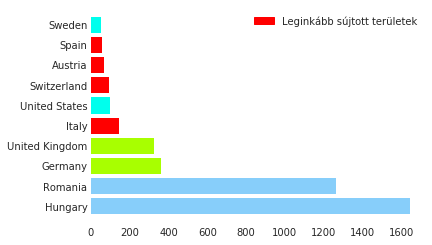

In [36]:
#style.use('seaborn-white')
rcParams['font.family'] = 'Georgia'
vals = []
labels = []
countries = hrcountry[:10]
for i in countries:
    vals.append(i[1])
    labels.append(i[0])

colors = ['lightskyblue', 'lightskyblue', '#A8FF00', '#A8FF00', 'red', '#00FFED', 'red', 'red',  'red','#00FFED']
plt.axes(frameon = False)
plt.grid(False)
plt.barh(labels, vals, color=colors)
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='off')
red_patch = mpatches.Patch(color='red', label='Leginkább sújtott területek')
plt.legend(handles=[red_patch])
plt.savefig('output/hrcountries.jpg', bbox_inches='tight', dpi=400,facecolor='white', transparent=True, edgecolor = None)
plt.show()

In [38]:
file = open('hrdata/balan_country.txt', 'r+')
countries = []
countries = file.readlines()
file.close()
balancountry = []
for line in countries:
    line = line[:-2]
    line = line[2:]
    line = line.split("', ")
    try:
        country = []
        country.append(line[0])
        country.append(int(line[1]))
        balancountry.append(country)
    except IndexError:
        continue

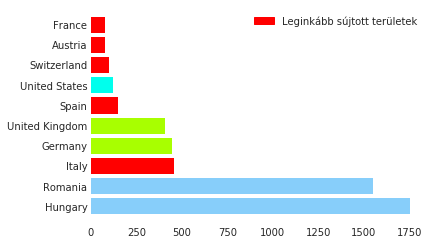

In [40]:
style.use('seaborn-white')
rcParams['font.family'] = 'Georgia'
vals = []
labels = []
countries = balancountry[:10]
for i in countries:
    vals.append(i[1])
    labels.append(i[0])

colors = ['lightskyblue', 'lightskyblue', 'red', '#A8FF00', '#A8FF00', 'red', '#00FFED', 'red',  'red','red']
plt.axes(frameon = False)
plt.grid(False)
plt.barh(labels, vals, color=colors)
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='off')
red_patch = mpatches.Patch(color='red', label='Leginkább sújtott területek')
plt.legend(handles=[red_patch])
plt.savefig('output/BALAN_hrcountries.jpg', bbox_inches='tight', dpi=400,facecolor='white', transparent=True, edgecolor = None)
plt.show()

In [5]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import datetime
import codecs
import sys
import random
import geocoder
from unidecode import unidecode
import csv
import reverse_geocoder as rg
import pprint
from unidecode import unidecode
from matplotlib import style
from matplotlib import rcParams
from matplotlib import cm
from difflib import SequenceMatcher
from unidecode import unidecode

In [6]:
fcities = []
fcity = open("fcity.txt", "r")
for line in fcity:
    city = line.split(',')
    fcities.append(city)
     

In [7]:
for l in fcities:
    l[1]= int(l[1])

findfont: Font family ['Georgia'] not found. Falling back to DejaVu Sans.


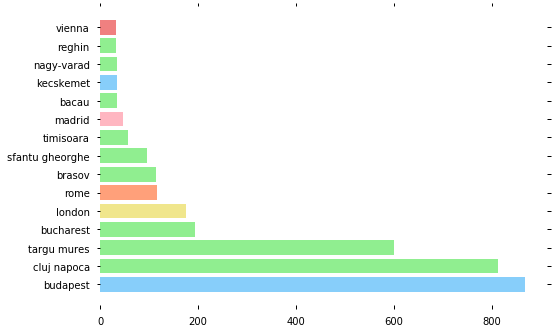

In [8]:
style.use('seaborn-notebook')
rcParams['font.family'] = 'Georgia'
vals = []
labels = []
cities = fcities[:15]
for i in cities:
    i[0] = i[0].lower()
    vals.append(i[1])
    labels.append(i[0])

colors = ['lightskyblue','lightgreen', 'lightgreen', 'lightgreen', 'khaki', 'lightsalmon', 'lightgreen', 'lightgreen', 'lightgreen', 'lightpink', 'lightgreen', 'lightskyblue', 'lightgreen',  'lightgreen','lightcoral']
plt.axes(frameon = False)
plt.grid(False)
plt.barh(labels, vals, color=colors)
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='off')
plt.savefig('frcities.png', bbox_inches='tight', transparent=True, dpi=400)
plt.show()

## 4. Geographical Data Plotting

In [9]:
import geocoder
def decode(place):      
	data = geocoder.arcgis(str(place))
	if data.address is not None:
		result = [data.latlng[0], data.latlng[1], data.address.split(', ')[0]]
		return result

In [10]:
geo_fcities = []
geo_fcity = open("geofcities.txt", "r")
for line in geo_fcity:
    geo_city = line.split(',')
    geo_fcities.append(geo_city)
     

In [11]:
print(len(geo_fcities))

1867


In [12]:
for l in geo_fcities:
    try:
        l[0] = l[0][2:]
        l[2] = l[2][:-1]
    except IndexError:
        del l

In [13]:
plt.rcParams['figure.figsize'] = (40,40)

I create new dataframe, more precisely, a GeoDataFrame, which can be easily manipulated for data representation and I will save the data I got from geocoding, to represent the cities on a world map.

In [14]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
from pyproj import CRS
newdata = gpd.GeoDataFrame()
newdata['geometry'] = None
newdata['location'] = None
print(newdata)


Empty GeoDataFrame
Columns: [geometry, location]
Index: []


In [15]:
coord = []
i = 0
for l in geo_fcities:
    try:
        l[0] = float(l[0])
        l[1] = float(l[1])
        tupi = (l[1],l[0])
        pont = Point(tupi)
        newdata.at[i, 'geometry'] = pont
        newdata.at[i, 'location'] = l[2]
        i +=1
    except (IndexError, ValueError):
        continue

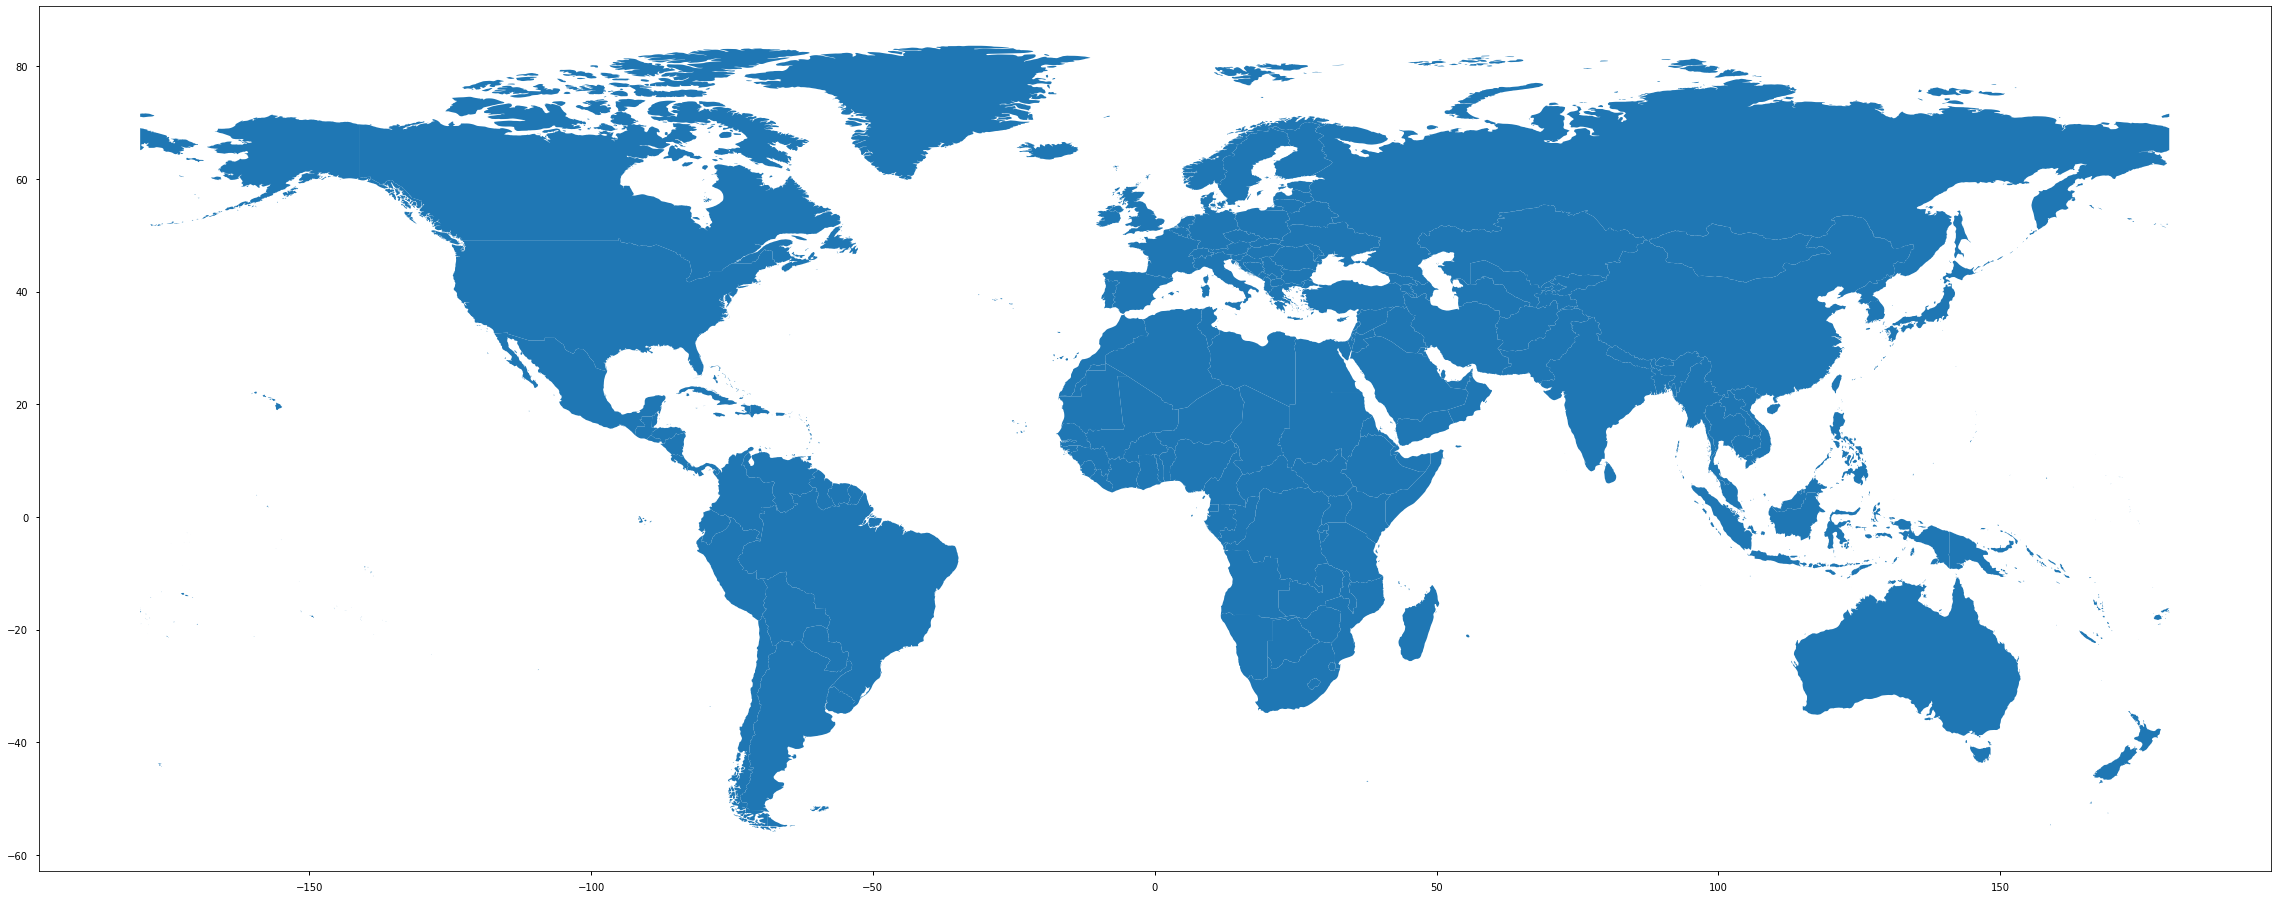

In [16]:
df_frontiera  =gpd.read_file('rodata/ro_frontiera_poligon.geojson')
df_judete = gpd.read_file('rodata/ro_judete_poligon.geojson')
df_localitati = gpd.read_file('rodata/ro_localitati_punct.geojson')
world = gpd.read_file('world.geojson')
world.plot()

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


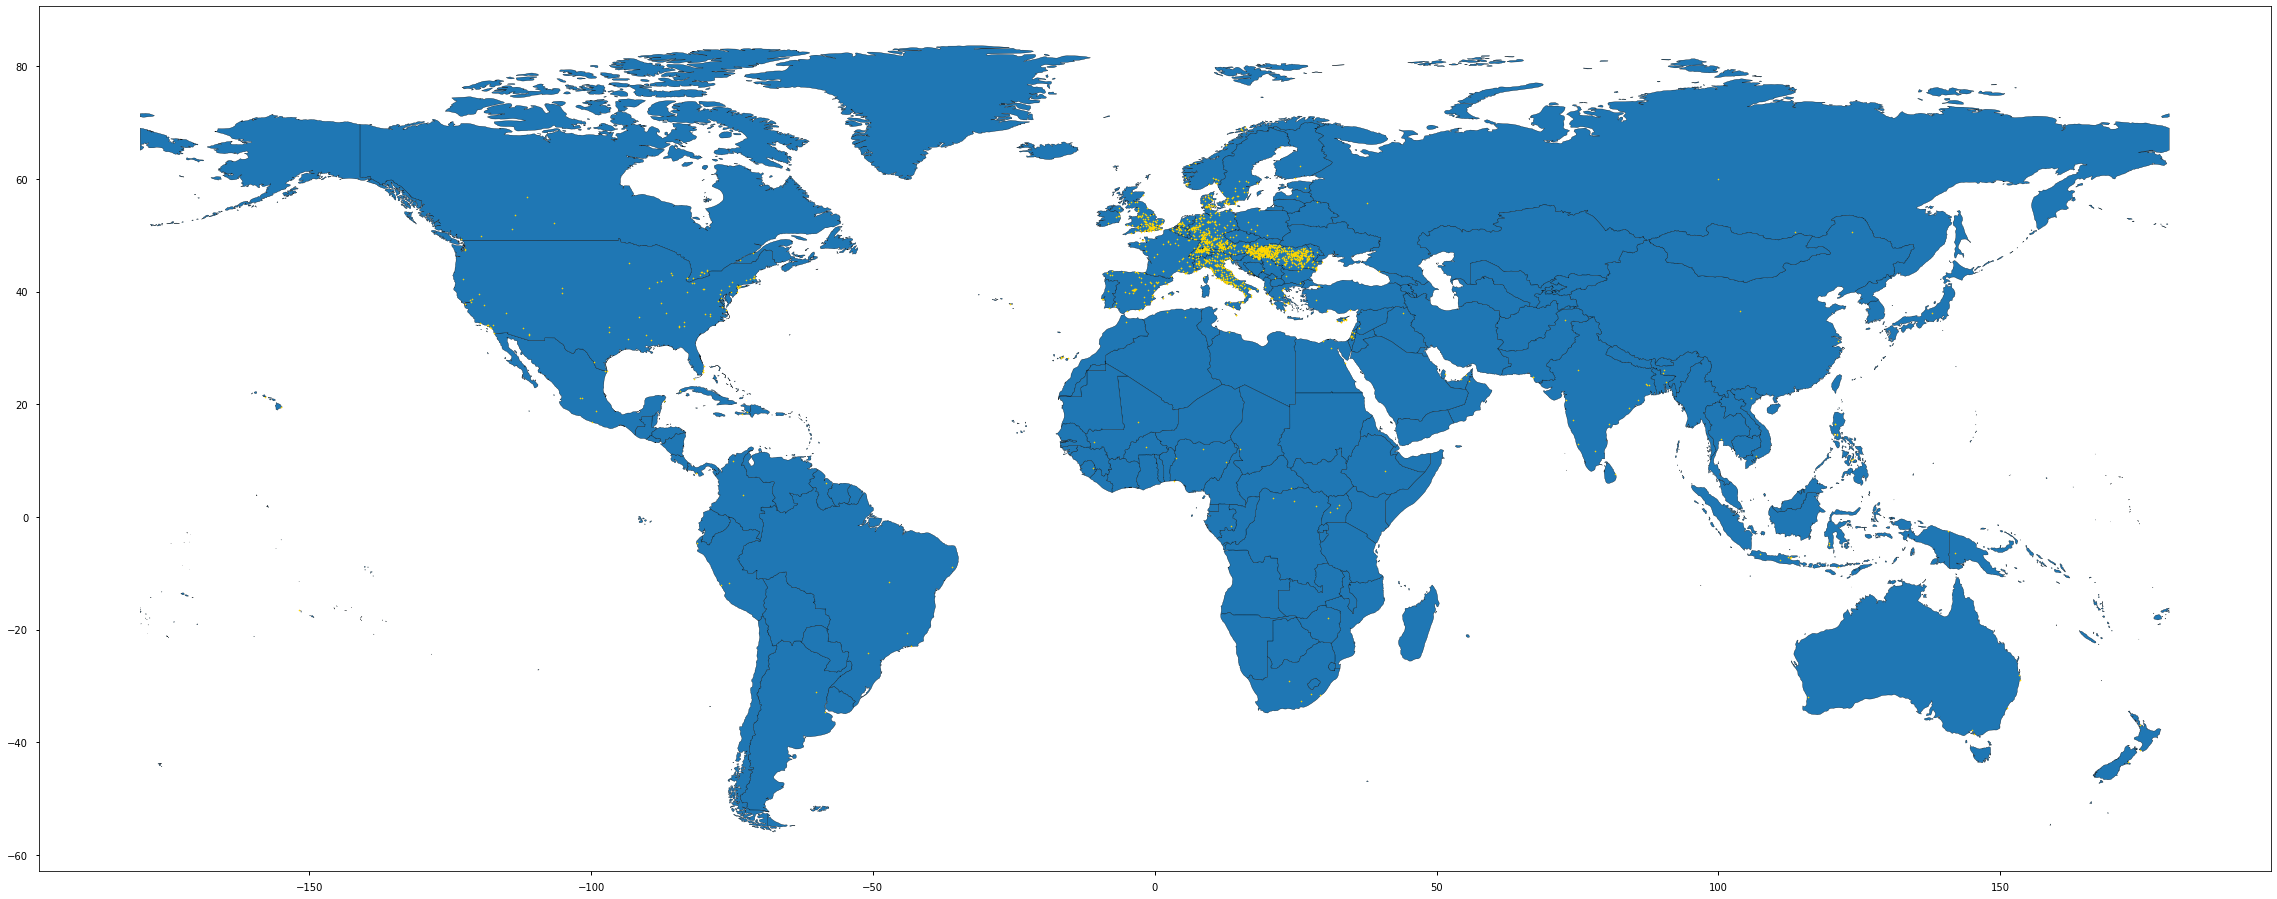

In [20]:
newdata.crs = {'init' :'epsg:4326'}
newdata = newdata.to_crs(world.crs)
base = world.plot( edgecolor = 'black')
newdata.plot(ax=base, marker='o', color = 'gold', markersize = 1.5)
plt.savefig('output/foreign2.jpg', dpi = 300)

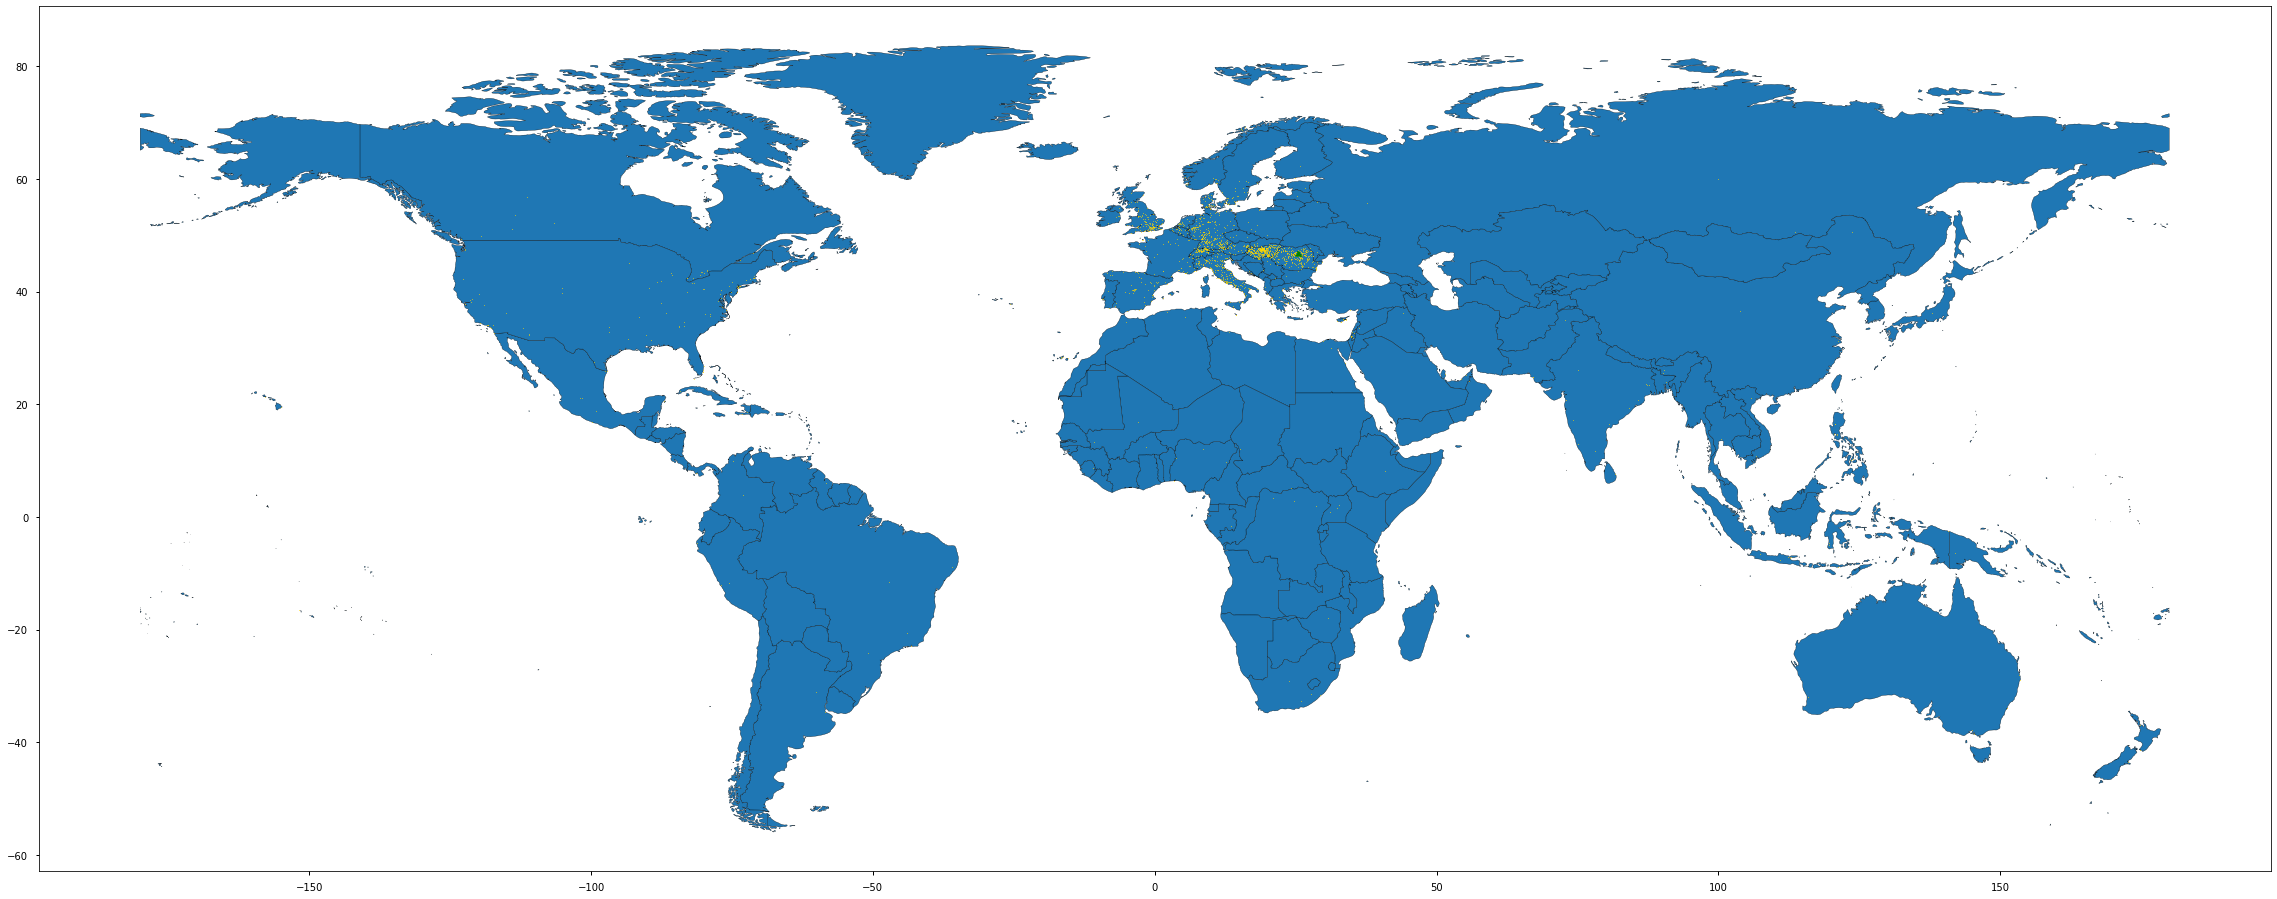

In [21]:
jud = df_judete
jud = jud.to_crs(newdata.crs)
base = world.plot( edgecolor = 'black')
base2 = newdata.plot(ax=base, marker='o', color = 'gold', markersize = 0.25)
jud[11:12].plot(ax = base2, color = 'green')
plt.savefig('output/foreign2_harghita.jpg', dpi = 300)

## 5. Data of Romania

In [30]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (40,40)
df_frontiera  =gpd.read_file('rodata/ro_frontiera_poligon.geojson')
df_judete = gpd.read_file('rodata/ro_judete_poligon.geojson')
df_localitati = gpd.read_file('rodata/ro_localitati_punct.geojson')
loc = df_localitati

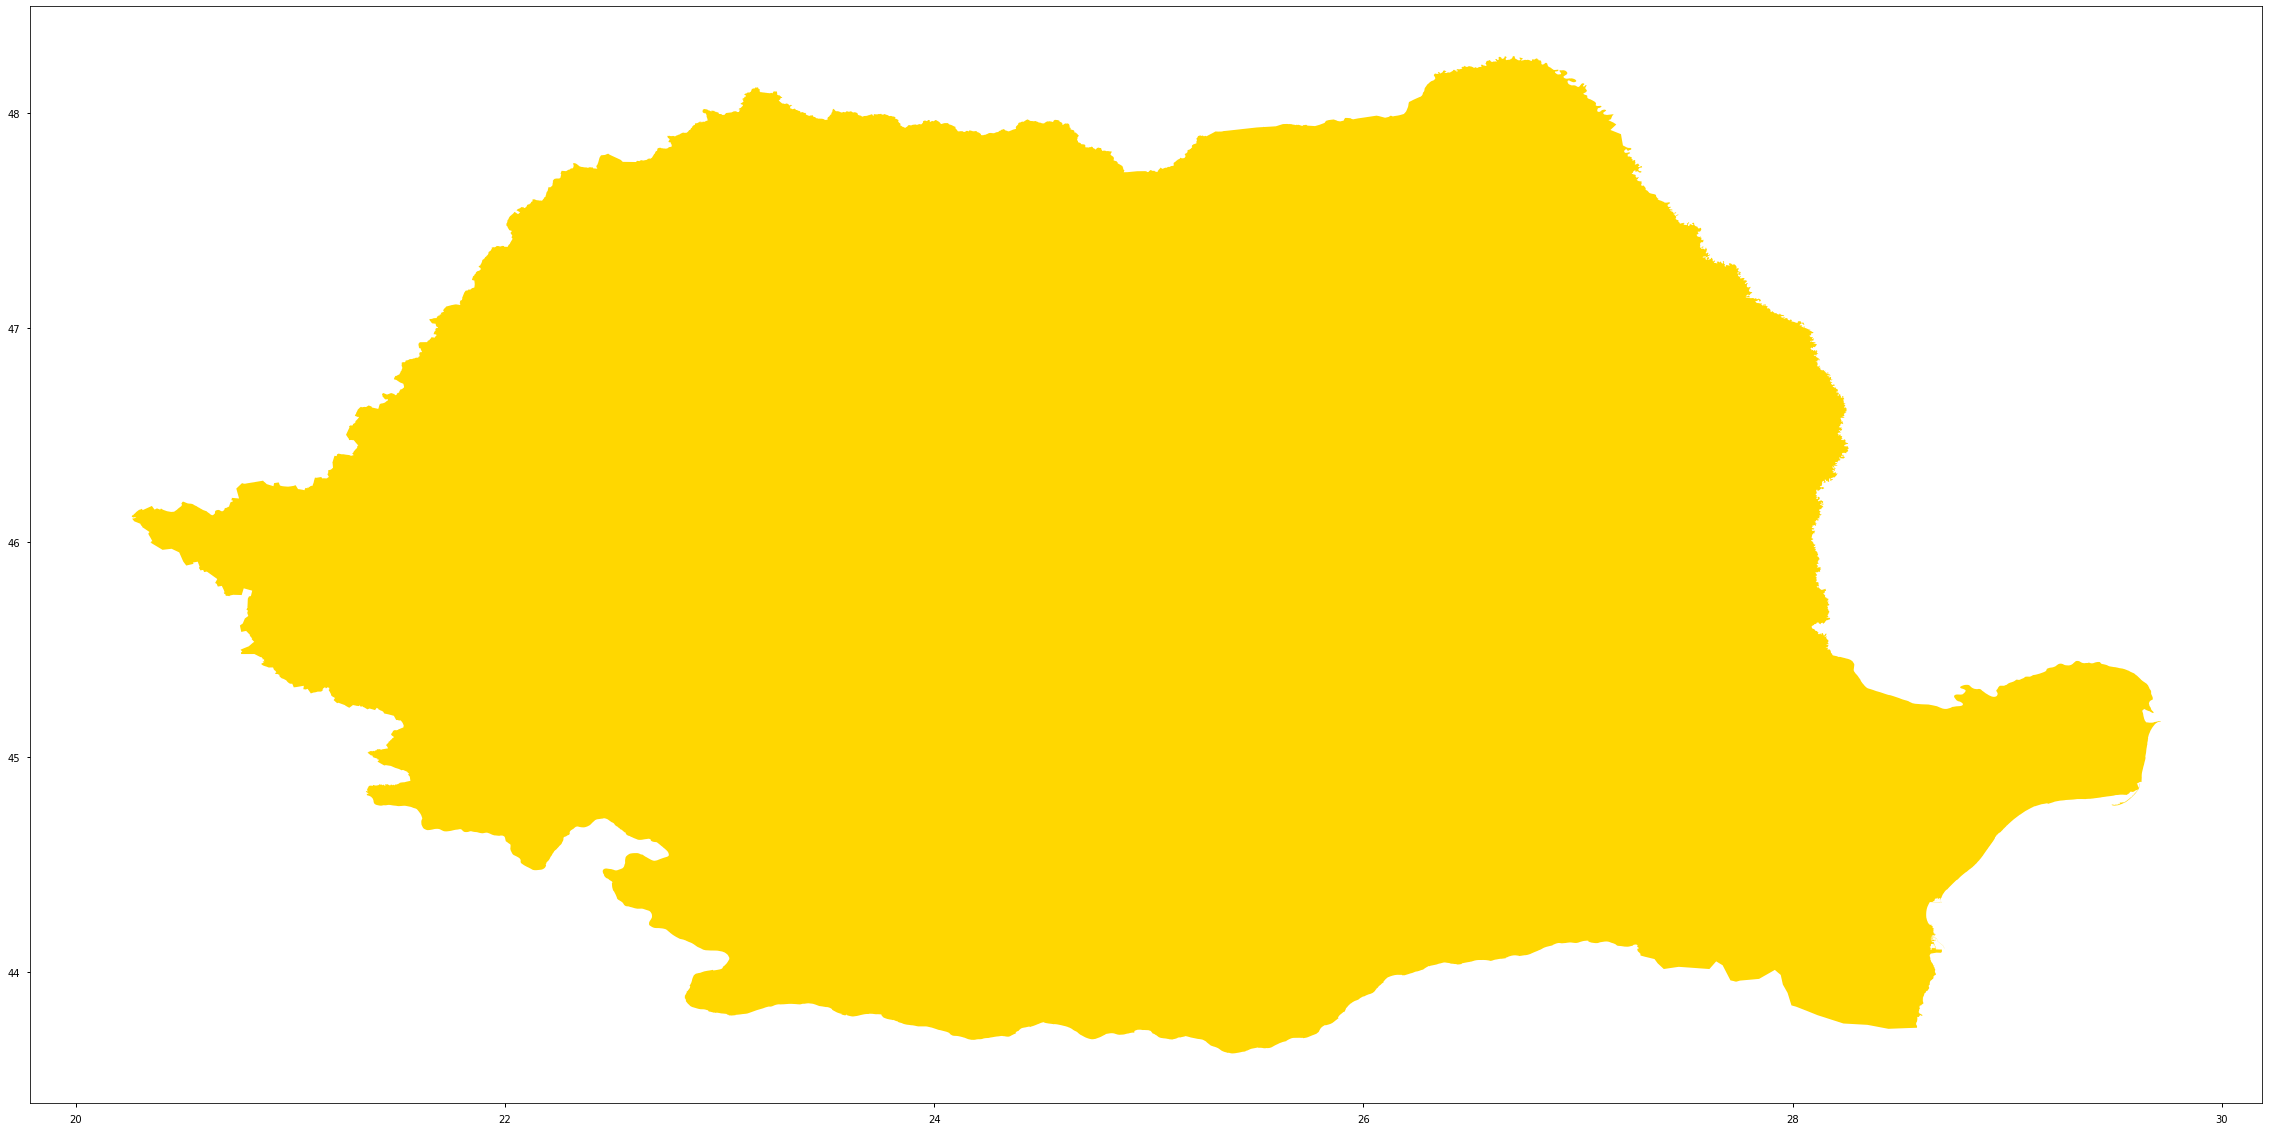

In [25]:
ax = df_frontiera.plot(color='gold')

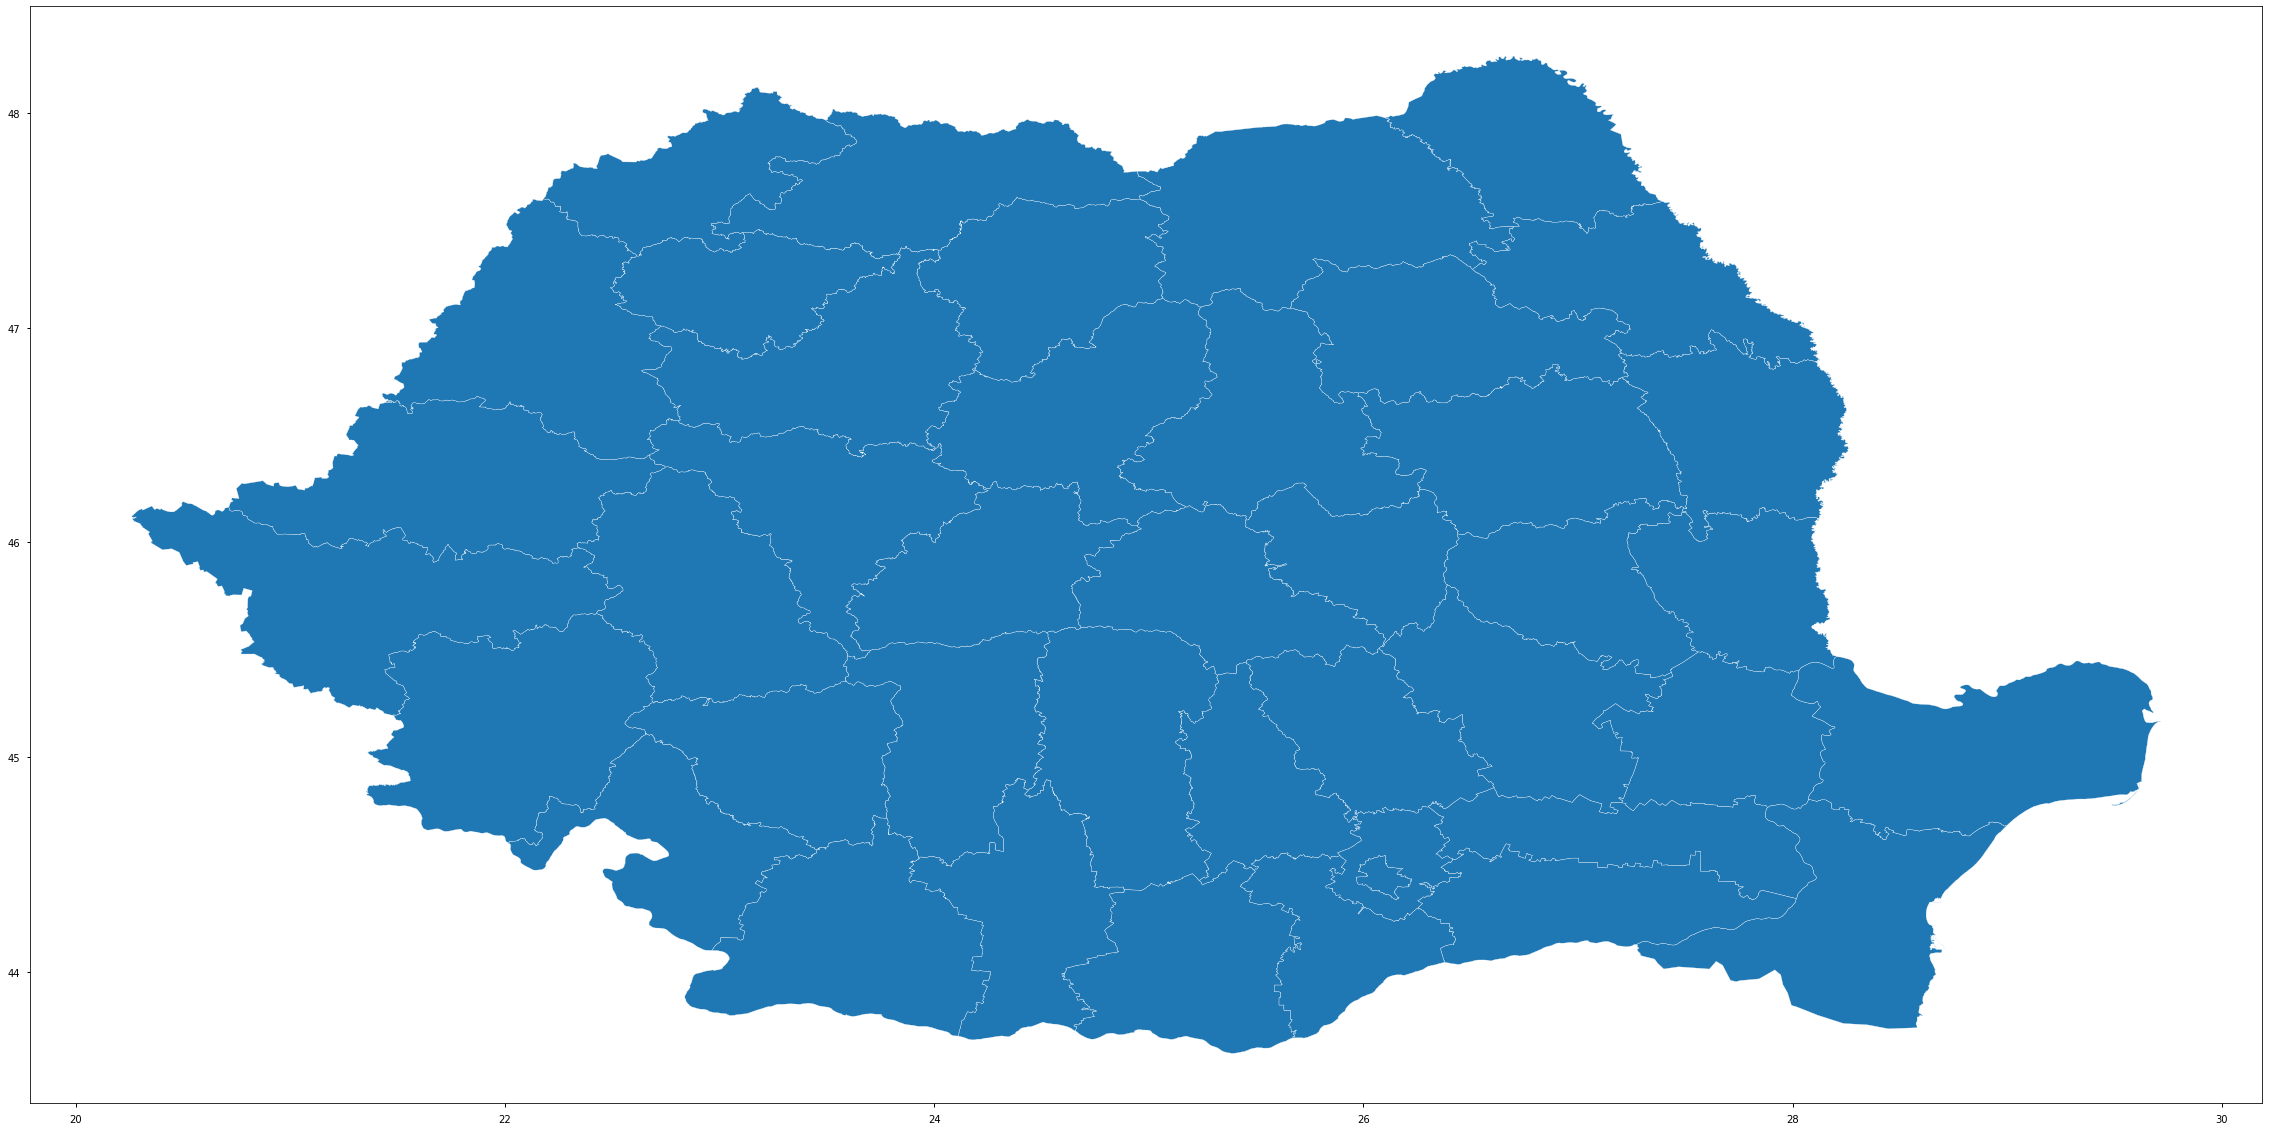

In [26]:
ax2 = df_judete.plot(edgecolor ='white')

In [27]:
for idx, row in df_localitati.iterrows():
    try:
        if (int(row['pop2002'])) > 2000:
            coordinates = row['geometry'].coords.xy
            x, y = coordinates[0][0], coordinates[1][0]
            ax.annotate(row['name'], xy = (x,y))
    except TypeError:
        continue

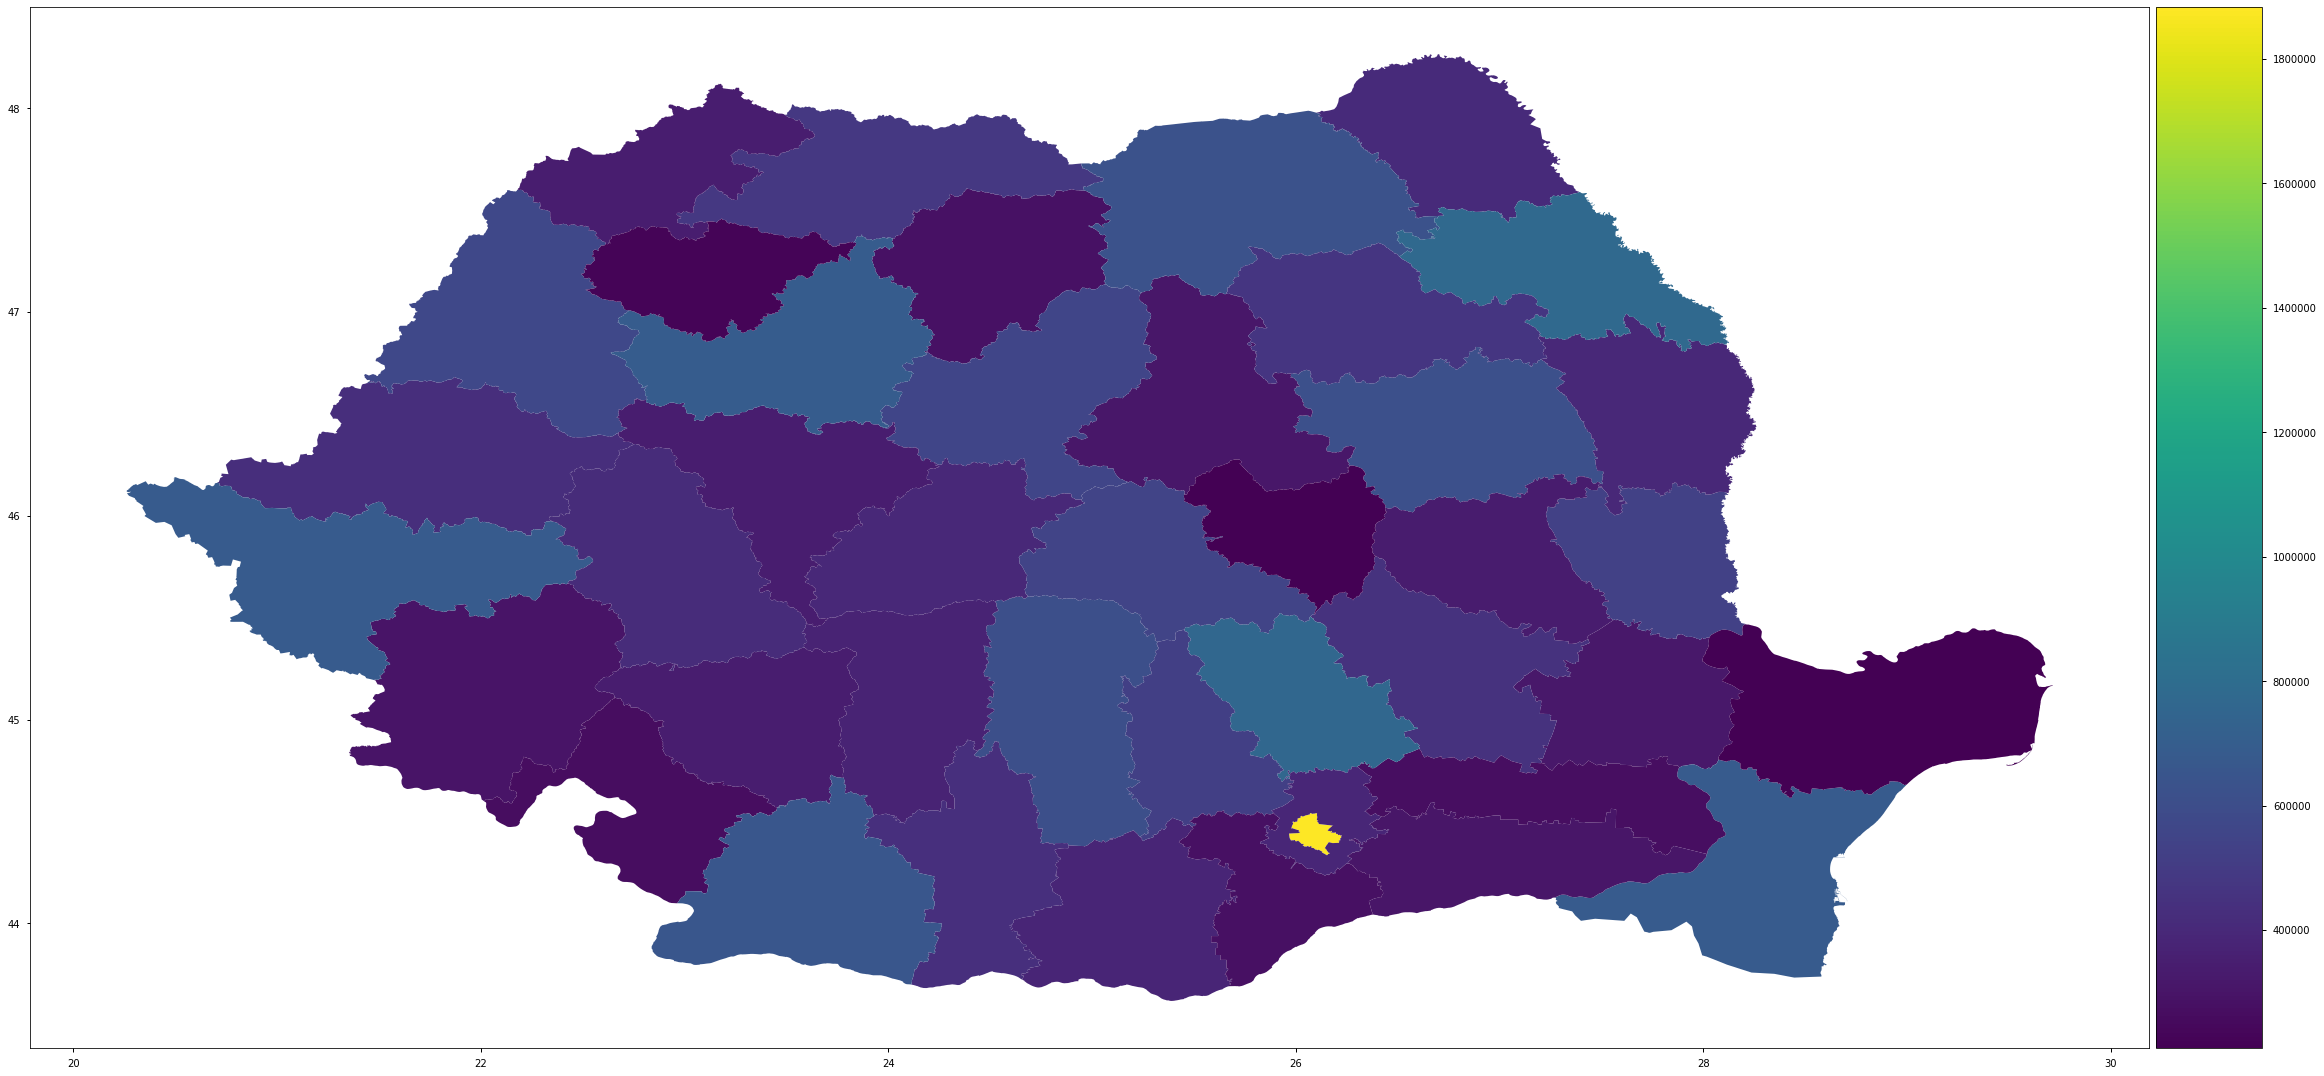

In [33]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1)
jud = df_judete
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
save = jud.plot(column = 'pop2011', ax = ax, legend = True, cax = cax)
plt.savefig('output/poprom.jpg')


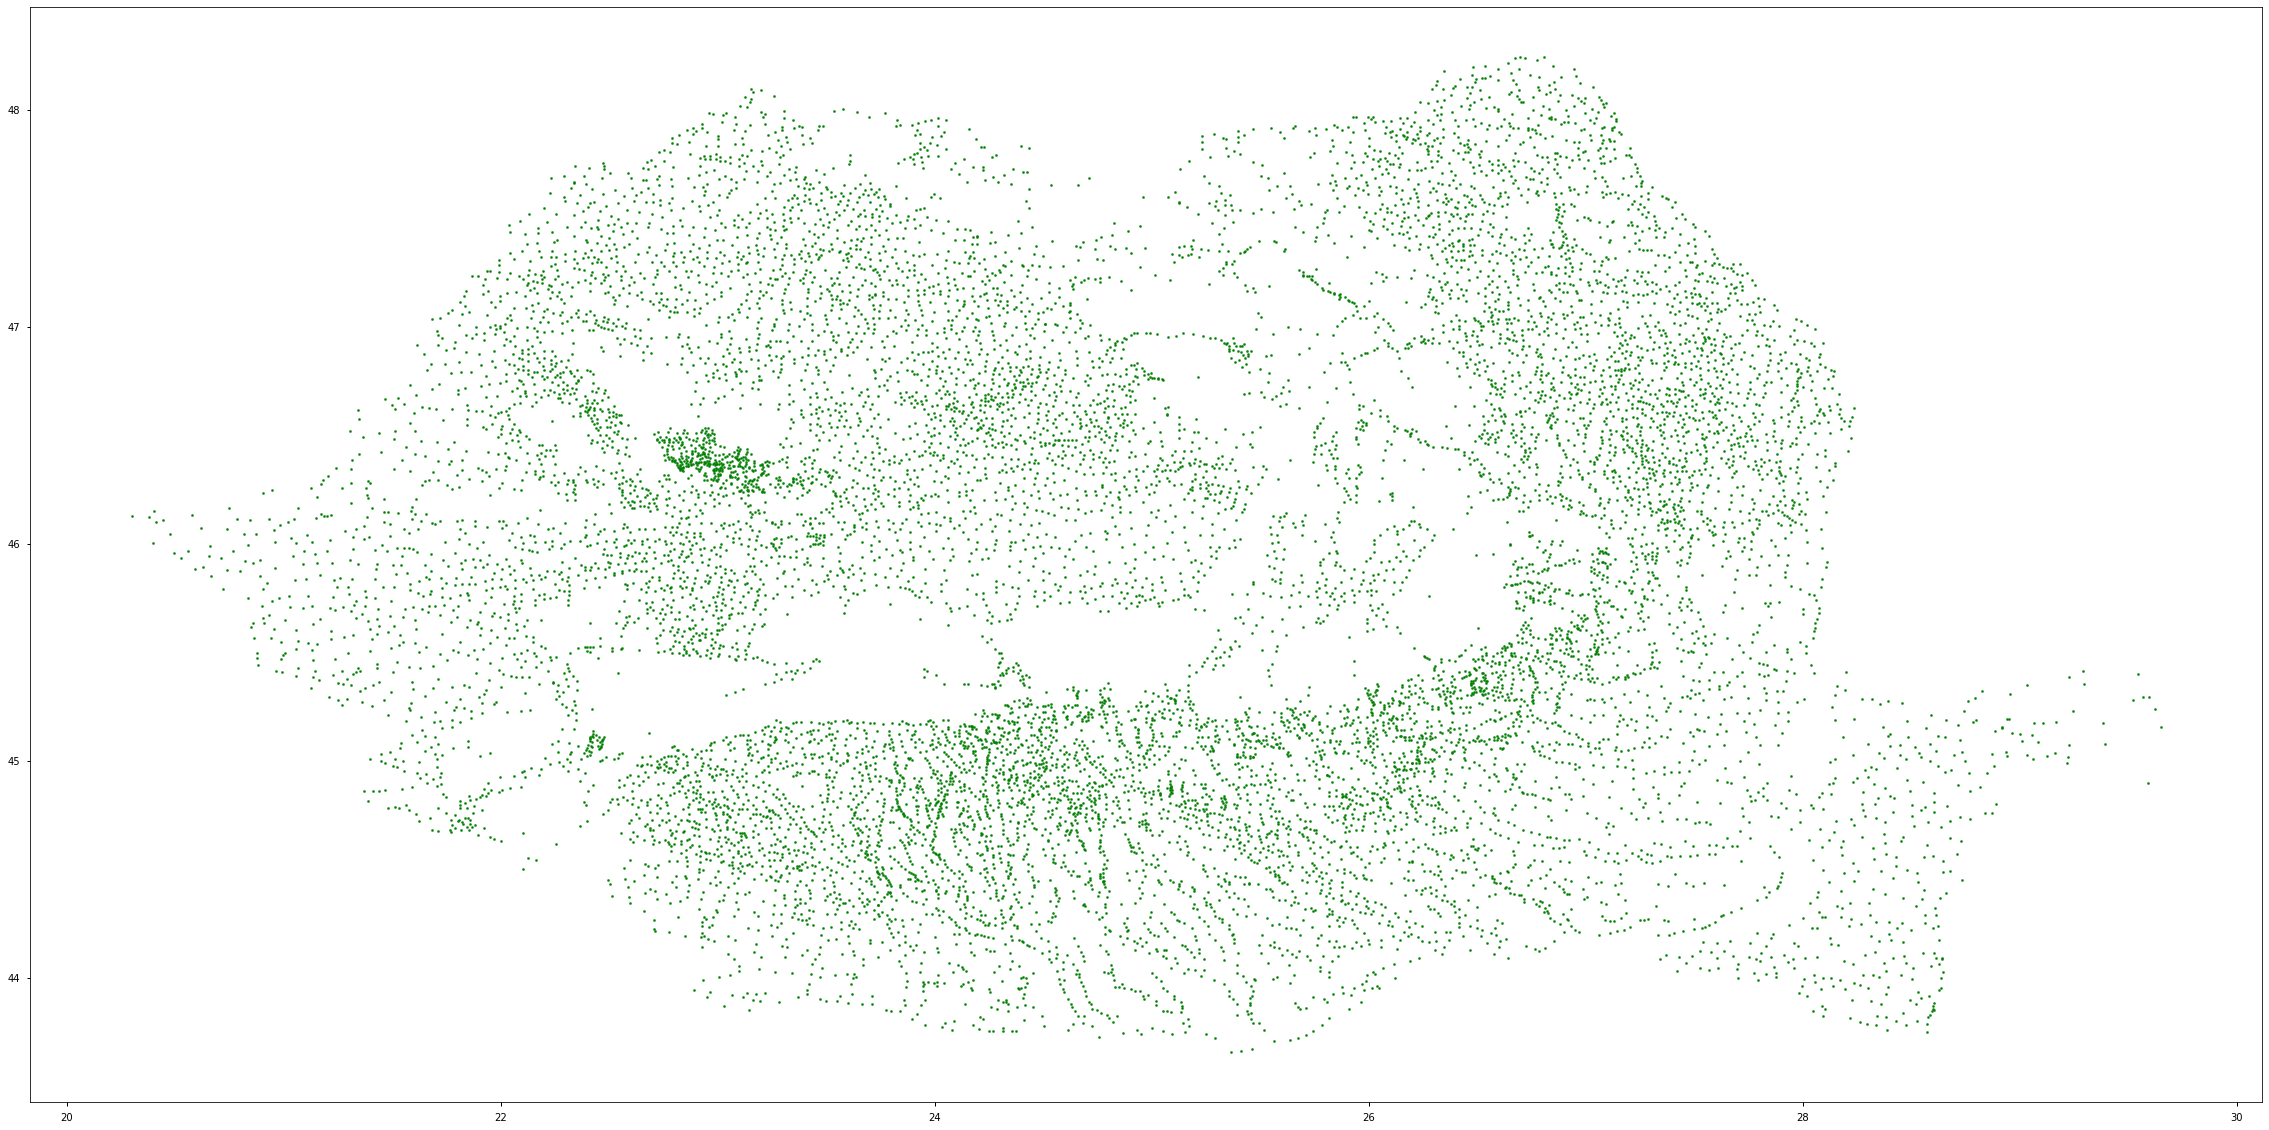

In [34]:
loc.plot(marker='o', color = 'green', markersize = 5)
loc = loc.to_crs(jud.crs)
plt.savefig('output/localitati.jpg')

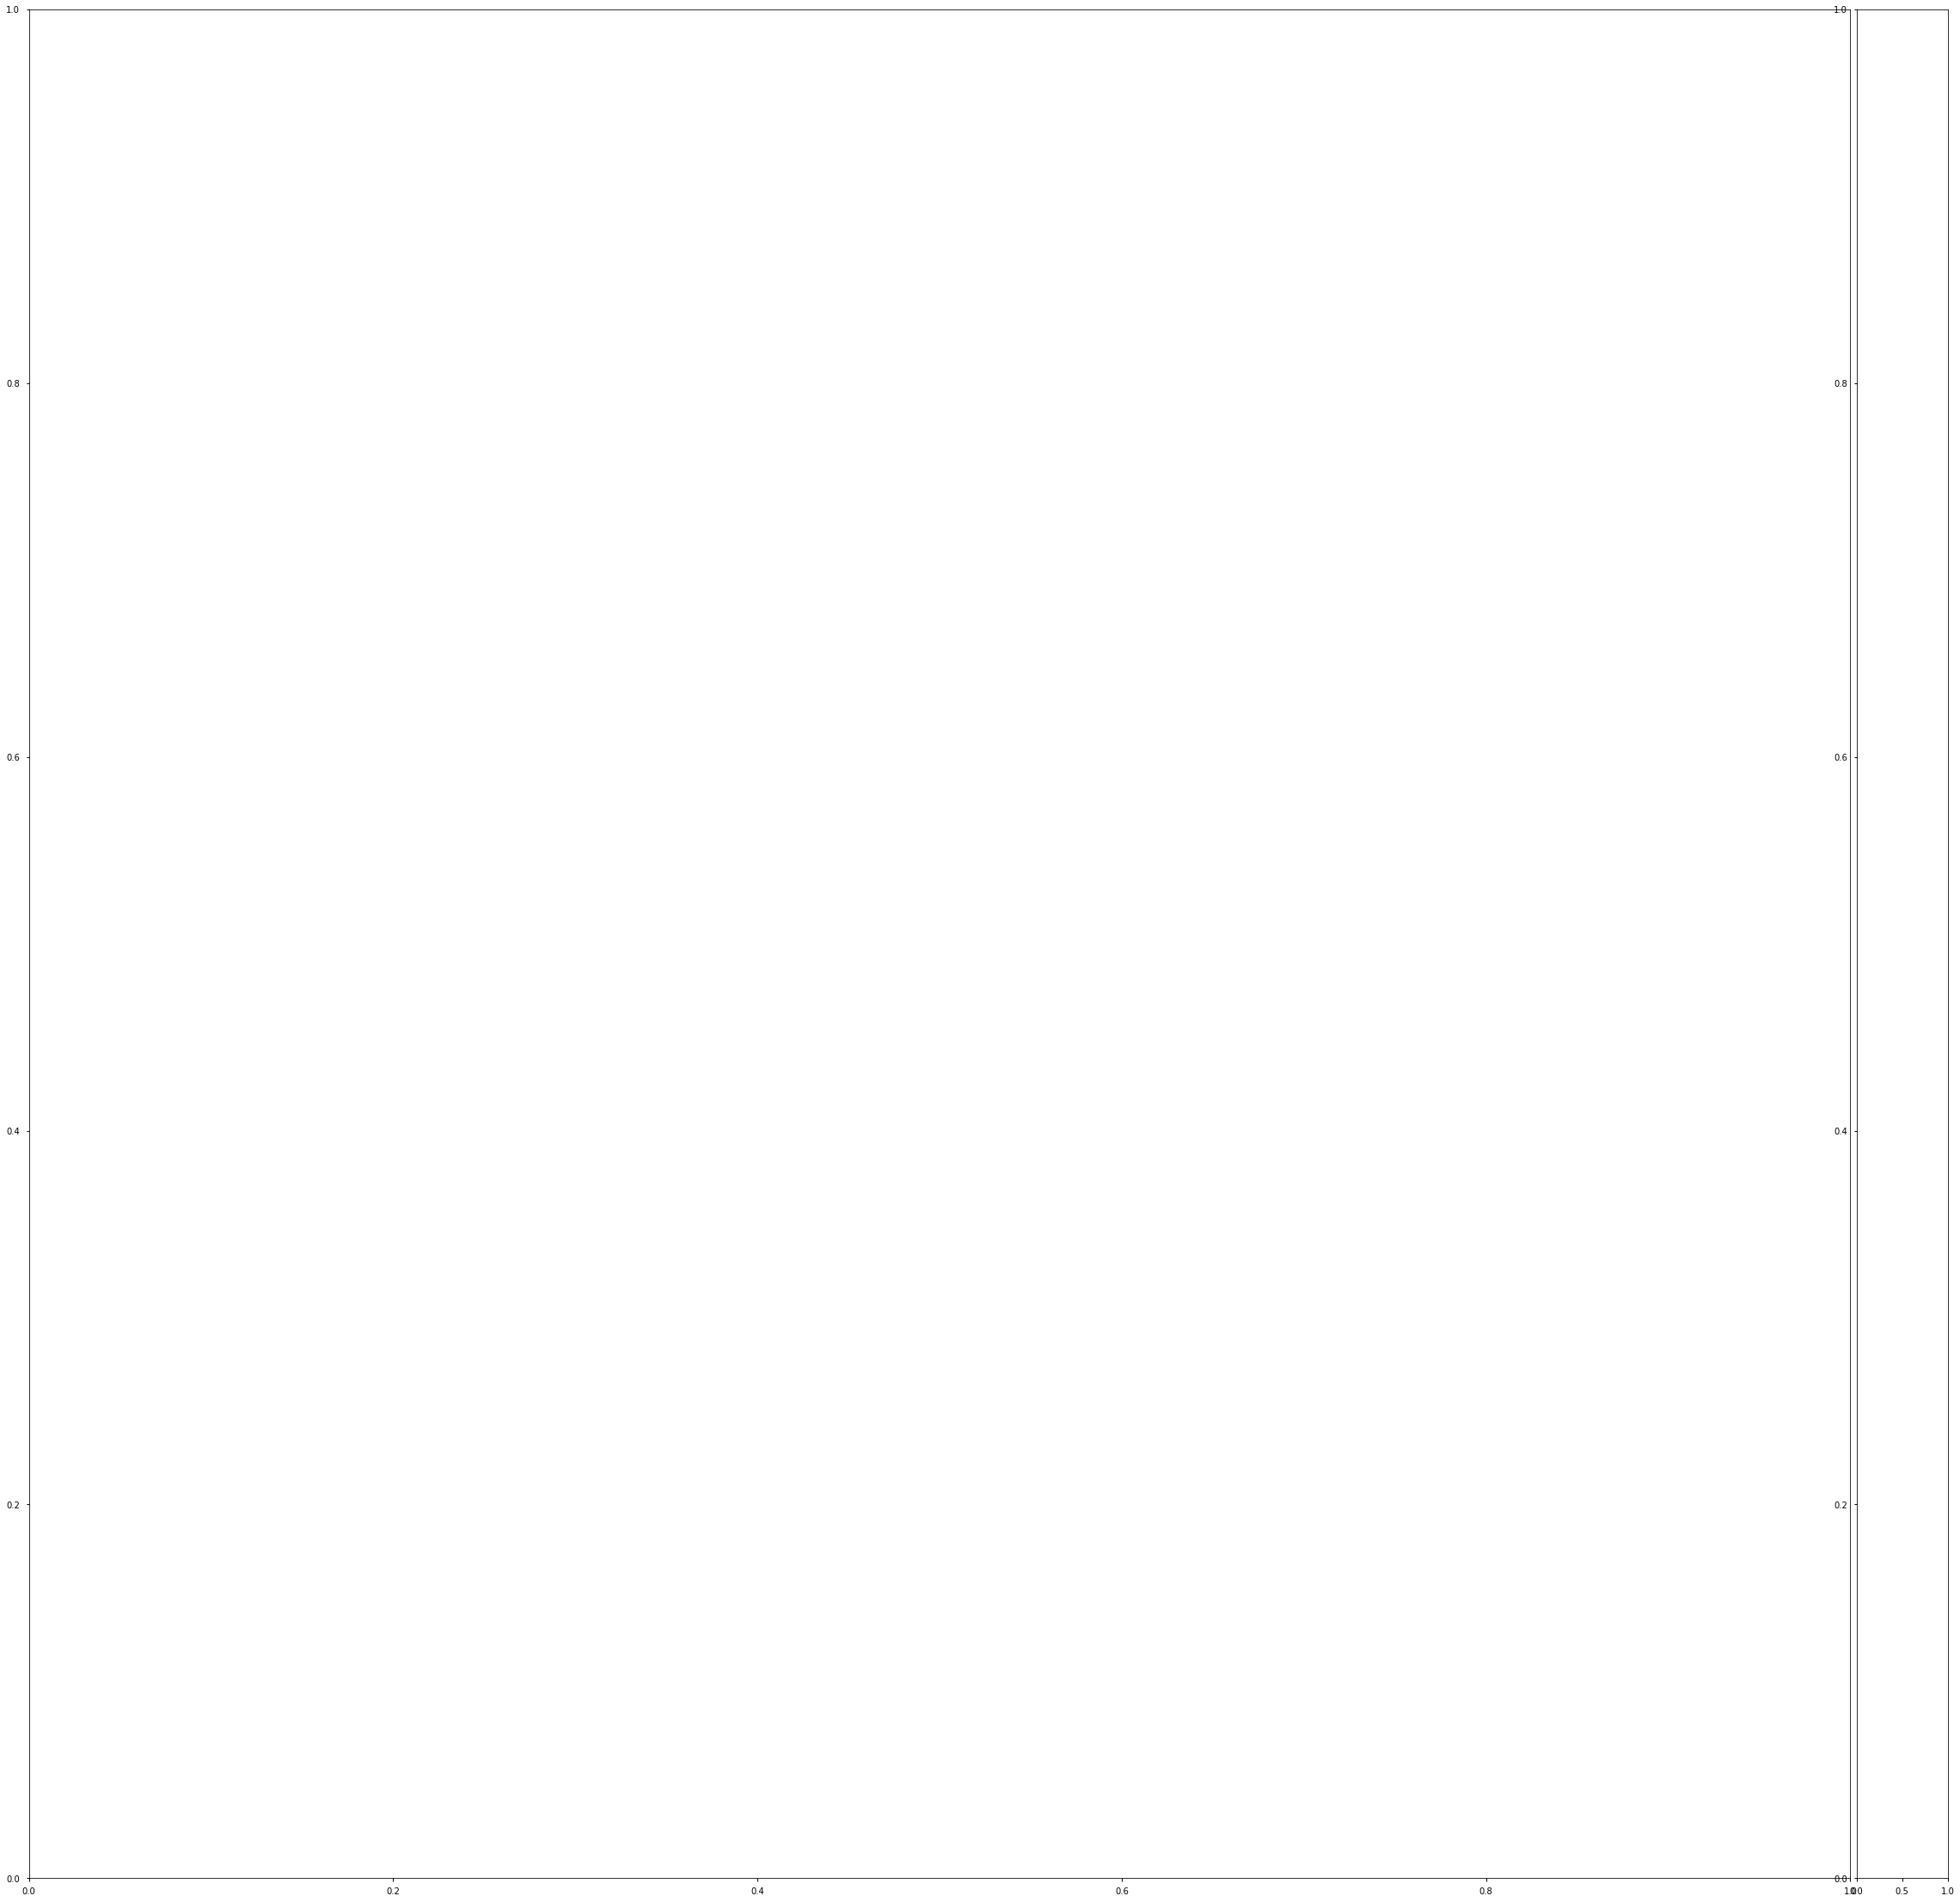

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
loc = df_localitati
fig, ax = plt.subplots(1,1)
divider = make_axes_locatable(ax)
base = jud.plot(color = 'white', edgecolor = 'black')
cax = divider.append_axes("right", size="5%", pad=0.1)
loc.plot(column = 'pop2002', ax = base, legend = True, cax = cax)

In [ ]:
base = jud.plot(color = 'white', edgecolor = 'black')
loc.plot(ax=base, marker='o', color = 'green', markersize = 5)
plt.savefig('output/judloc.jpg')